# Übungen zu Teilchenphysik I
## Exercise 05 - Geant4, Part 2
---

This second part of the exercise sheet gives an overview of the working principle of calorimeters.
The [introduction](#Intro) provides an overview of the different types of calorimeters, connects the knowledge from the undergrad courses to the current lecture and sets the environment for the following exercises.
`Exercise 1` performs a simplified calibration to connect a measured detector readout to the observed deposited energy of photons. 
Subsequently, `Exercise 2` repeats the methods from the first exercise for different particle types.
Finally, `Exercise 3` discusses and determines the energy resolution in calorimeters.

# Introduction: Calorimeter <a id="Intro"></a>
---

Electromagnetic calorimeters are primarily optimised to measure as precisely as possible the energy of photons and electrons.
The other type of calorimeters, namely hadron calorimeters, specials on dealing with hadronic showers.
The key differences for hadronic showers are:

- The hadronic interaction length is much larger than the radiation length of photons and electrons.
- Hadronic showers consist to about a third of neutral pions that decay into two photons.
- Lastly, hadronic showers contain a large fraction (20-40%) of "invisible" particles which reduces the possible energy resolution in comparison to electromagnetic calorimeters. 

<div>
<img src="HadronicShower.png" width="800"/>
</div>

[Source](https://www.physi.uni-heidelberg.de/~sma/teaching/ParticleDetectors2/sma_HadronicCalorimeters.pdf)


Another design choice for calorimeters is (are) the used material(s). A first-order distinction can be made for the homogenous and sampling calorimeter:
- **Sampling calorimeter** <br>
    Sampling calorimeters have a layered structure with alternating layers of absorber (passive) and detector (active) material.
    On the one hand, the design and material choice are flexible and optimisable to a specific task or financial budget.
    On the other hand, some of the energy is deposited in the absorber which limits the energy resolution.
- **Homogenous calorimeter** <br>
    Here, one material is used simultaneously as an absorber and active material.
    Consequently, all the energy is deposited in the detector which allows for an optimal energy resolution.
    Also, the choice of the material can be specialised to the task, e.g. CsI has a very low light yield but allows for fast readout; CsI(Tl) has high light yield but slow readout. 
    However, the materials capable of this task (mostly scintillator crystals) are custom made which makes them often very expensive and very heavy.
    
The following exercises will focus on a sampling calorimeter structure with lead absorbers and liquid argon as active material.

A key aspect of calorimeters is the readout of the detector which determines the measured energy of the particle.
The total number of particles in an electromagnetic shower is proportional to the initial energy of the particle.
One very common use case in high-energy particle experiments is the use of scintillation materials.
In this case, the electromagnetic shower leads to the production of photons in the visible spectrum which can be measured by photo multipliers, photo diodes, etc.
For example, the voltage measured at a silicon photomultiplier is proportional to the number of incoming photons which in turn is proportional to the initial energy.
The following exercises will discuss a closely related measurement principle: The count of charged particles in the active material.

# Exercise 1: Calorimeter calibration <a id="Exercise3"></a>
---

This exercise presents a very simplified version of the calibration of the photon energy deposition in a calorimeter. 
The goal is to determine the relation between the number of charged shower particles (in reality this would be a current) in the detector and the corresponding initial energy.
The setup is inspired by the [sampling electromagnetic calorimeter (ECAL) of ATLAS](https://atlas.cern/Discover/Detector/Calorimeter).
Here, incoming particles can shower in the lead absorbers.
The shower particles then ionize the liquid argon, ions drift to electrodes and the resulting number of charged particles (current) is measured.

To set up the simulation for this exercise follow the initialization instructions from the previous exercises.
In this and the following exercises, we will use a different physics list than in the previous exercises. 
We will use the physics list `MyQGSP_BERT` which includes hadronic interactions as well.

The desired sampling calorimeter can be built by the `samplingcalo(lenAbsorber, lenActive, numLayers)` geometry.
This method produces `numLayers` layers of $(10\times 10\times\text{lenAbsrober/lenActive})\,$cm alternating absorber/active material. <br>
For example,
```python
  g4.set_geometry('samplingcalo(2.,1.,15)')
```
will create a calorimeter with lead absorbers of thickness 2 cm and scintillator tiles of thickness 1 cm, and a total of 15 absorber layers.

Initialize the simulation:
- Construct the `ApplicationManager()`, 
- build the calorimeter from the example,
- set the correct physics list and
- initialize.

In [1]:
import geant4_simulation as g4sim
import numpy as np
import matplotlib.pyplot as plt
from kafe2 import XYContainer, Fit, Plot

# Initialize the simulation.
g4 = g4sim.ApplicationManager()
g4.set_geometry('samplingcalo(2.,1.,15)')
g4.set_physics_list('MyQGSP_BERT')
g4.initialize()


**************************************************************
 Geant4 version Name: geant4-10-06-patch-02    (29-May-2020)
                       Copyright : Geant4 Collaboration
                      References : NIM A 506 (2003), 250-303
                                 : IEEE-TNS 53 (2006), 270-278
                                 : NIM A 835 (2016), 186-225
                             WWW : http://geant4.org/
**************************************************************

Visualization Manager instantiating with verbosity "warnings (3)"...
<<< Geant4 Physics List simulation engine: QGSP_BERT

###Changing the neutron cuts of the physicslist...

###Adding step limiter physics to the Geant4 simulation engine...

### Adding tracking cuts for neutron  TimeCut(ns)= 10000  KinEnergyCut(MeV)= 0
### Adding tracking cuts for neutron  TimeCut(ns)= 10000  KinEnergyCut(MeV)= 0.5


In this exercise, calibrate the given calorimeter for photons, i.e. determine the constant that translates the number $N_{c}$ of charged particles passing the scintillator into the energy $E_{\text{in}}$ of the initial particle.

To compute $N_{c}$, simulate for 20 different energies in the interval of $[1, 15]\,$GeV the interaction of 100 photons with the given calorimeter.
For each simulated photon, read the number of charged particles traversing the scintillator layers. 
The number can be obtained using the `calo_readout()` method from the `ApplicationManager` class. 
Be aware, this method only works for one event, therefore, you need to loop over the desired number of photon interaction simulations.
Compute the mean and its uncertainty (standard deviation divided by the square root of the number of samples) for each energy and store the result.
Finally, fit the mean number of charged tracks per event and the simulated energy with an appropriate model.

**Hint**: A smaller sample size while debugging the code can be useful here.

**Hint**: For a fit with `kafe2` you can use the `XYContainer` and `Fit` modules.

```python
def fit_function(x, <function arguments>):
    return <function>

# prepare data and fit
data = XYContainer(x_data=...,
                   y_data=...)
data.add_error(...)
fit = Fit(data, fit_function)

# execute fit
fit.do_fit()

# show fit
plot = Plot(fit)
plot.plot()
plt.show()
```

In [2]:
# Set the primary particle to photon.
g4.set_particle(22)

signal, error = [], []

# set used energies
eList = np.linspace(1., 15., 20)
# @tutors: for the solution I chose a smaller number to make it fast. 
# Students should have the correct value -> smaller uncertainties per data point
nSamples = 10 
# Loop over energies from 1 to 15 GeV.
for e in eList:
    print(f"Running at energy {e} GeV.")
    # Set the energy of the electron.
    g4.set_energy(e)
    
    numOfTracks = []
    
    # Start some runs with the same energy.
    for _ in range(nSamples):
        g4.start_run()
        numOfTracks.append(g4.calo_readout())

    # Calculate the mean value and standard deviation of the signal.
    signal.append(np.mean(numOfTracks))
    # Divide standard deviation by the square root of the number of samples since we are interested in the uncertainty on the mean value and not the uncertainty of a single measurement.
    error.append(np.std(numOfTracks)/np.sqrt(len(numOfTracks)))

Running at energy 1.0 GeV.

phot:  for gamma SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 61 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 7 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 56 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
       Klein-Nishina : Emin=    0 eV  Emax=  100 TeV

conv:  for gamma SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 18 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
     BetheHeitlerLPM : Emin=    0 eV  Emax=  100 TeV  ModifiedTsai

Rayl:  for gamma SubType=11 BuildTable=1
      Lambda table from 100 eV  to 100 keV, 7 bins/decade, spline: 0
      LambdaPrime table from 100 keV to 100 TeV in 63 bins 
      ===

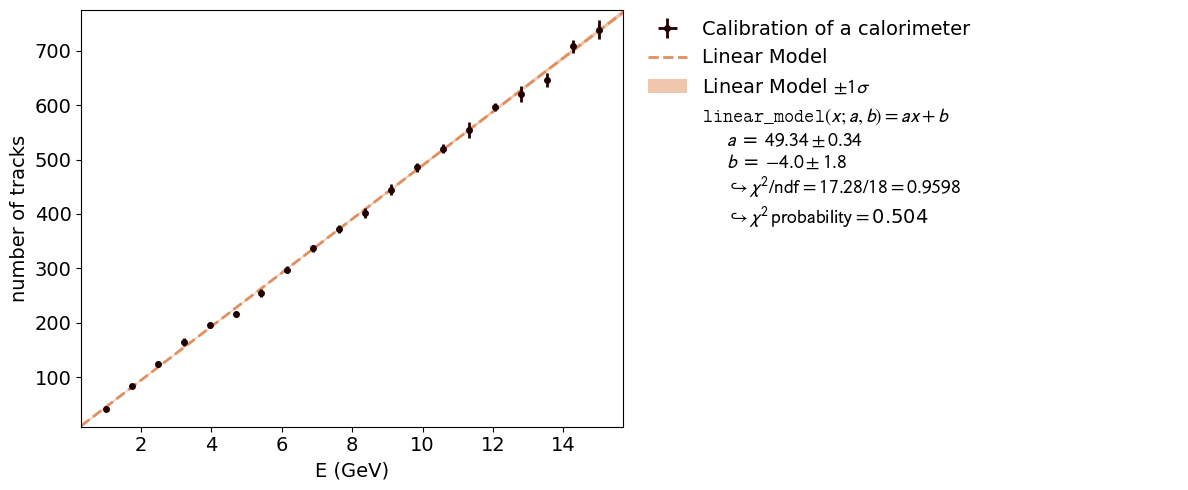

In [3]:
def linear_model(x, a, b):
    return a * x + b

# prepare fit
data = XYContainer(x_data=eList,
                   y_data=signal)

data.label = 'Calibration of a calorimeter'
data.axis_labels = ['E (GeV)','number of tracks']

data.add_error(axis='y', err_val=error)

fit = Fit(data, linear_model)

# add cosmetic options
fit.model_label = "Linear Model"
fit.assign_parameter_latex_names(a='a', b="b")
fit.assign_model_function_latex_expression("{a}{x} + {b}")

# execute fit
fit.do_fit()

# show fit
plot = Plot(fit_objects=fit)
plot.plot()
plt.show()

# Exercise 2: Calorimeter response to different particle types <a id="Exercise4"></a>
---

In this exercise, investigate the response of our sampling calorimeter to different types of particles.

Write a module that repeats the previous exercise as follows:
- Set the particle type.
- Define the desired energies. Here, choose 10 different steps  in the interval of $[1, 10]\,$GeV.
- Loop over 100 samples.
- Store the mean number of charged tracks per event and its uncertainty.
- Fit the mean number of charged tracks.

Study the detector response for electrons (PDG code 11), photons (PDG code 22) and charged pions (PDG code 211).
To contain the full pion shower, increase the number of sampling layers to 50.

<div class="alert alert-info">
<strong>Question 2.1:</strong> 
Do you see any differences between electron and photon induced showers? Why?
</div>

<div class="alert alert-success">
<strong>Answer 2.1:</strong> 
Unsurprisingly there is not much difference to photons (both electromagnetic showers).
</div>

<div class="alert alert-info">
<strong>Question 2.2:</strong> 
Do you see any differences between charged pion and photon induced showers? Why?
</div>

<div class="alert alert-success">
<strong>Answer 2.2:</strong> 
The response for pions is similar in the considered energy range, i.e., there is a (roughly) linear relationship between the energy of the initial particle and the number of charged particles produced in the electromagnetic shower. However, the proportionality constant is different compared to electrons and photons.
</div>

In [4]:
# Initialize the simulation.
g4.set_geometry('samplingcalo(2.,1.,50)')
g4.initialize()

def plot_particle(particle_type=22, name="photon"):
    # Set the primary particle to photon.
    g4.set_particle(particle_type)

    signal, error = [], []

    # set used energies
    eList = np.linspace(1., 10., 10)
    nSamples = 10
    # Loop over energies from 1 to 10 GeV.
    for e in eList:
        print(f"Running at energy {e} GeV.")
        # Set the energy of the electron.
        g4.set_energy(e)
        
        numOfTracks = []
        
        # Start some runs with the same energy.
        for _ in range(nSamples):
            if e == 5 and _ == 5:
                g4.start_run(visualize=True)
            else:
                g4.start_run()
            numOfTracks.append(g4.calo_readout())

        # Calculate the mean value and standard deviation of the signal.
        signal.append(np.mean(numOfTracks))
        error.append(np.std(numOfTracks)/np.sqrt(len(numOfTracks)))

    # prepare fit
    data = XYContainer(x_data=eList, y_data=signal)

    data.label = 'Calibration of a calorimeter'
    data.axis_labels = ['E (GeV)','number of tracks']

    data.add_error(axis='y', err_val=error)

    fit = Fit(data, linear_model)

    # add cosmetic options
    fit.model_label = name

    # execute fit
    fit.do_fit()
    
    return fit

======       Pre-compound/De-excitation Physics Parameters     ========
Type of pre-compound inverse x-section              3
Pre-compound model active                           1
Pre-compound excitation low energy (MeV)            0.1
Pre-compound excitation high energy (MeV)           30
Type of de-excitation inverse x-section             3
Type of de-excitation factory                       Evaporation+GEM
Number of de-excitation channels                    68
Min excitation energy (keV)                         0.01
Min energy per nucleon for multifragmentation (MeV) 2e+05
Limit excitation energy for Fermi BreakUp (MeV)     20
Level density (1/MeV)                               0.075
Use simple level density model                      1
Use discrete excitation energy of the residual      0
Time limit for long lived isomeres (ns)             ... truncated===========================================    
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal num

Running at energy 1.0 GeV.
Running at energy 2.0 GeV.
Running at energy 3.0 GeV.
Running at energy 4.0 GeV.
Running at energy 5.0 GeV.
/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination direc

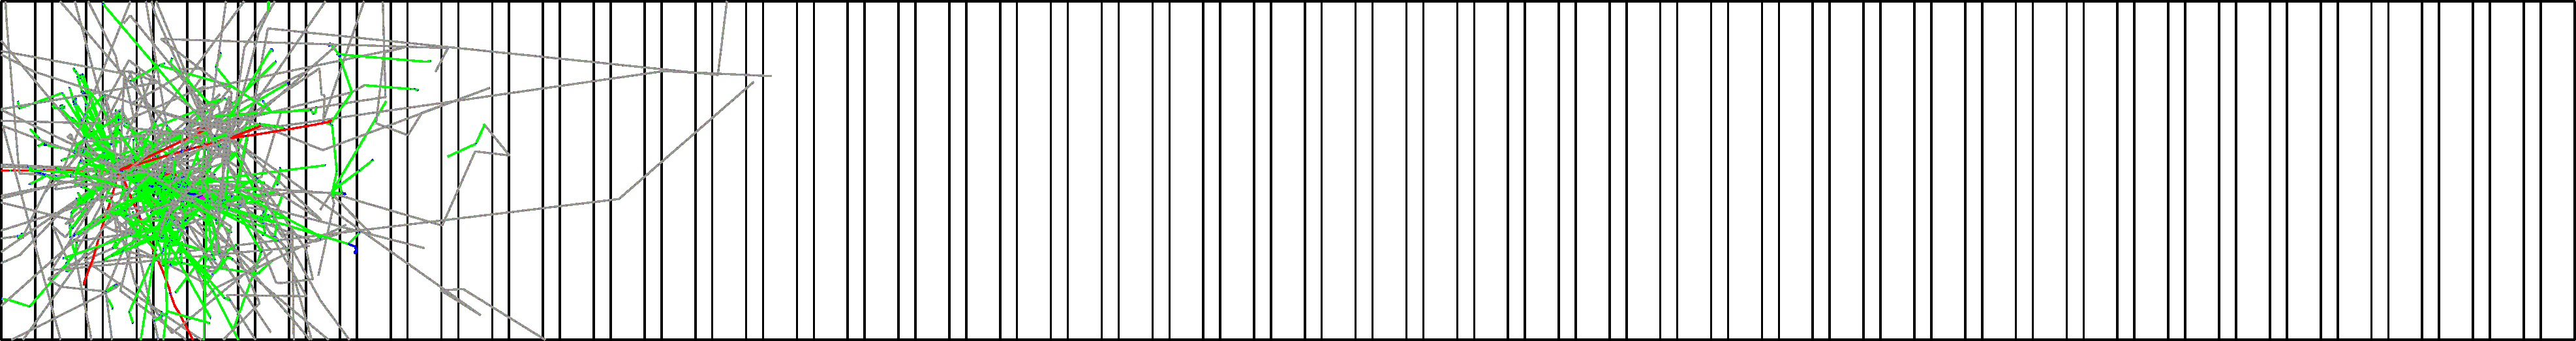

Running at energy 6.0 GeV.
Running at energy 7.0 GeV.
Running at energy 8.0 GeV.
Running at energy 9.0 GeV.
Running at energy 10.0 GeV.
Running at energy 1.0 GeV.
Running at energy 2.0 GeV.
Running at energy 3.0 GeV.
Running at energy 4.0 GeV.
Running at energy 5.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.


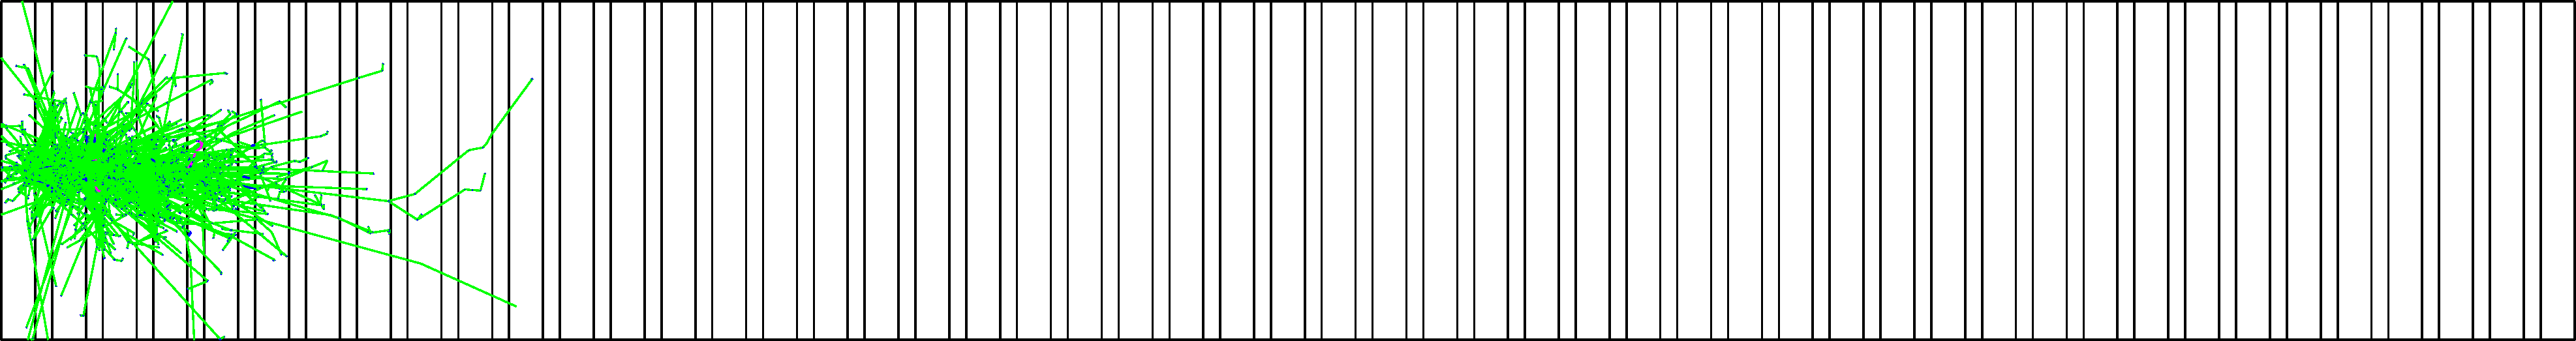

Running at energy 6.0 GeV.
Running at energy 7.0 GeV.
Running at energy 8.0 GeV.
Running at energy 9.0 GeV.
Running at energy 10.0 GeV.
Running at energy 1.0 GeV.
Running at energy 2.0 GeV.
Running at energy 3.0 GeV.
Running at energy 4.0 GeV.
Running at energy 5.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.


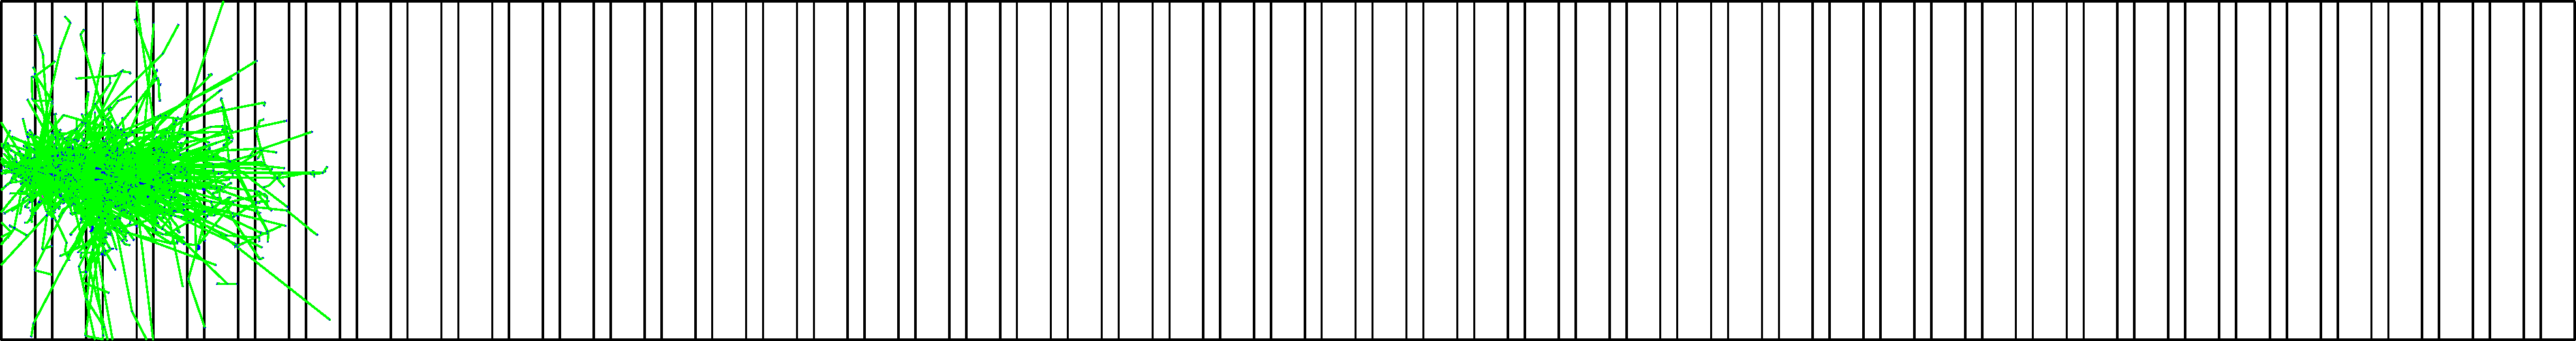

Running at energy 6.0 GeV.
Running at energy 7.0 GeV.
Running at energy 8.0 GeV.
Running at energy 9.0 GeV.
Running at energy 10.0 GeV.


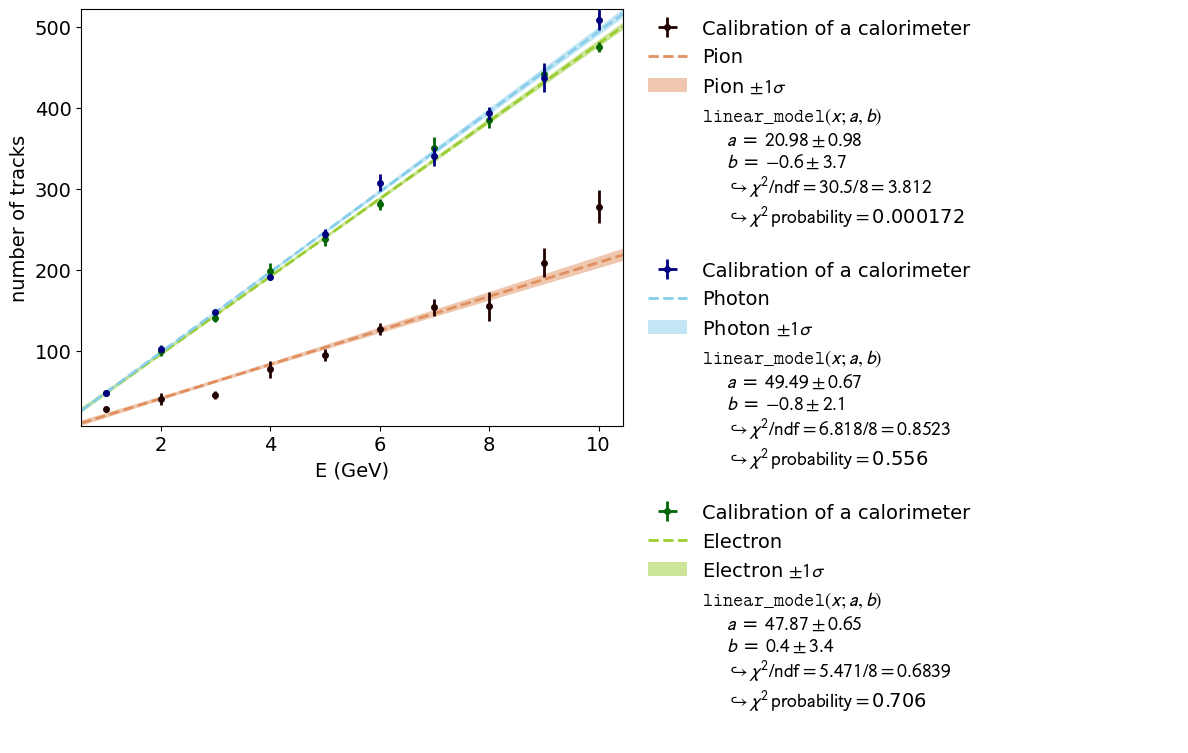

In [5]:
fit1 = plot_particle(211, "Pion")
fit2 = plot_particle(22, "Photon")
fit3 = plot_particle(11, "Electron")

# show fit
plot = Plot(fit_objects=(fit1, fit2, fit3))
plot.plot()
plt.show()

# Exercise 3: Calorimeter resolution <a id="Exercise5"></a>
---

In this exercise, we want to determine the stochastic factor $a$ of the energy resolution $\frac{\sigma(E)}{E}$ of the calorimeter for photons as a function of the photon energy $E_{\text{in}}$.

<div class="alert alert-info">
<strong>Question 3.1:</strong> 
    
* Why do we only care about the stochastic contribution here?
* How does the resolution depend on the energy $E_{\text{in}}$?
</div>

<div class="alert alert-success">
<strong>Answer 3.1:</strong>

* The noise and the constant term are dependent on the physical machine (see below on which factors exactly). In this simple simulation these effects don't play a role.
* The relative calorimetric energy-resolution is usually characterised as
\begin{equation*}
  \frac{\sigma(E)}{E} = \frac{N}{E} \oplus \frac{S}{\sqrt{E}} \oplus C \;,
\end{equation*}
i.e. improves with increasing energy $E$ of the incident particle. In the simulated example only the stochastic term $S$ contributes to the resolution.
* At low energies, the calorimeter resolution is dominated by electronic noise, described by the *noise term* $N$. It is determined by readout electronics and radiation backgrounds.
* At larger energies, fluctuations of the shower development, e.g. the track length of individual particles in the cascade, dominate, pasteurised by the *stochastic term* $S$.
* At high energies, the resolution is ultimately limited by miscalibration and non-uniformities of the calorimeters, which is described by the *constant term* $C$.</div>

To compute the energy deviation $\sigma(E)$, simulate for 20 different energies in the interval of $[1, 10]\,$GeV the interaction of 100 photons.
Use a liquid argon sampling calorimeter (15 layers) from the [first exercise](#Exercise1).
For each event, calculate the responding energy by calculating the number of charged tracks $N_c$ and apply the previously computed calibration.
Store the deviation of the response energy $\sigma(E)$ as the standard deviation over all samples. 
The uncertainty for $\sigma(E)$ can be calculated as $\frac{\sigma(E)}{\sqrt{N_\text{Sample}-1}}$.
Finally, fit $\frac{\sigma(E)}{E}$ with an appropriate model and determine the stochastic factor $a$.

<div class="alert alert-info">
<strong>Question 3.2:</strong> 
Does the result fulfil the expectation?
</div>

<div class="alert alert-success">
<strong>Answer 3.2:</strong> 
The student's fit result should be between 10-20%. This number is typical for sampling calorimeters. See [PDG](https://pdg.lbl.gov/2024/reviews/rpp2024-rev-particle-detectors-accel.pdf) page 81 and following.
</div>

In [6]:
g4.set_geometry('samplingcalo(2.,1.,15)')
g4.initialize()

g4.set_particle(22)

# store the calibration factor
calfactor = fit2.get_result_dict()["parameter_values"]["a"]

eList = np.linspace(1., 10., 20)
nSamples = 40  # To make it a little bit faster...

deviation = []
deviation_unc = []
for e in eList:
    print(f"Running at energy {e} GeV.")
    # Set the energy of the electron.
    g4.set_energy(e)
    
    response = []
    
    # Start some runs with the same energy.
    for _ in range(nSamples):
        g4.start_run()
        response.append(g4.calo_readout()/calfactor)

    # Calculate the standard deviation of the signal.
    deviation.append(np.std(response))
    deviation_unc.append(np.std(response)/np.sqrt(len(response)-1))

deviation = np.array(deviation)
deviation_unc = np.array(deviation_unc)

resolution = deviation / eList
resolution_unc = deviation_unc / eList

/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Running at energy 1.0 GeV.
Running at energy 1.4736842105263157 GeV.
Running at energy 1.9473684210526314 GeV.
Running at energy 2.4210526315789473 GeV.
Running at energy 2.894736842105263 GeV.
Running at energy 3.3684210526315788 GeV.
Running at energy 3.8421052631578947 GeV.
Running at energy 4.315789473684211 GeV.
Running at energy 4.789473684210526 GeV.
Running at energy 5.263157894736842 GeV.
Running at energy 5.7368421052631575 GeV.
Run

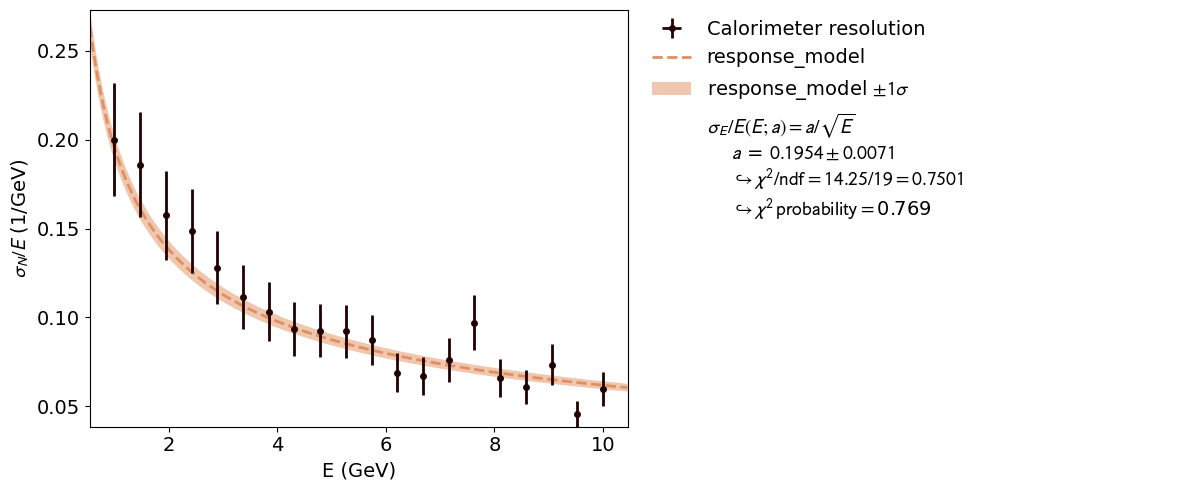

In [7]:
def response_model(x, a=0.1):
    return a / np.sqrt(x)

data = XYContainer(x_data=eList,
                   y_data=resolution)

data.label = 'Calorimeter resolution'
data.axis_labels = ['E (GeV)',r'$\sigma_N / E$ (1/GeV)']

data.add_error(axis="y", err_val=resolution_unc)

response_fit = Fit(data, model_function=response_model)
response_fit.assign_parameter_latex_names(x="E", a="a")
response_fit.assign_model_function_latex_expression("{a} / \\sqrt{{E}}")
response_fit.assign_model_function_latex_name("\\sigma_E / E")
response_fit.do_fit()

plot = Plot(fit_objects=response_fit)
plot.plot()
plt.show()

<div class="alert alert-info">
<strong>(Hard) Question:</strong> 
How does the energy resolution of a sampling calorimeter depend on the thickness of the absorber layers?
</div>

<div class="alert alert-success">
<strong>Answer:</strong> 

* In sampling calorimeters, the number $N_{c}$ of charged shower particles which cross the active layers is inverse proportional to the thickness $t$ of the absorber layers,
\begin{equation*}
  N_{c} \propto \frac{E}{t} \,,
\end{equation*}
because the active layers are interleaved with absorber layers.
* Thus, the energy deposited in the active medium fluctuates event by event (*sampling fluctuations*).
* Assuming statistically independent crossings of the active layers, the *sampling contribution* to the relative energy resolution becomes
\begin{equation*}
  \frac{\sigma(E)}{E} \propto \frac{1}{\sqrt{N_{c}}} \propto \sqrt{\frac{t}{E}} \,.
\end{equation*}
* The smaller the thickness $t$, the larger the number of times the shower is sampled by the active layers, and the better the energy resolution.
* Hence, in principle the energy resolution of a sampling calorimeter can be improved by reducing the thickness of the absorber layers.
* The following code is not expected from the students
</div>

In [8]:
def linear_1par(x, a=5.):
    return a * x

def calibrate_calorimeter(energies=np.linspace(1., 10., 4),
                          samples=10):
    energy, signal, error = [], [], []
    
    for e in energies:
        print(f"Running at energy {e} GeV.")
        # Set the energy of the electron.
        g4.set_energy(e)
        
        numOfTracks = []
        
        # Start some runs with the same energy.
        for _ in range(samples):
            g4.start_run()
            numOfTracks.append(g4.calo_readout())
    
        # Calculate the mean value and standard deviation of the signal.
        signal.append(np.mean(numOfTracks))
        # Divide standard deviation by the square root of the number of samples since we are interested in the uncertainty on the mean value and not the uncertainty of a single measurement.
        error.append(np.std(numOfTracks)/np.sqrt(len(numOfTracks)))
    
    data = XYContainer(x_data=energies,
                       y_data=signal)

    data.label = 'Calibration of a calorimeter'
    data.axis_labels = ['E in GeV','number of tracks']
    
    data.add_error(axis='y', err_val=error)
    
    fit = Fit(data, linear_1par)
    fit.do_fit()
    # plot = Plot(fit_objects=fit)
    # plot.plot()
    # plt.show()
    return fit.get_result_dict()["parameter_values"]["a"]

now at absorber thickness 0.01 cm.
/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Running at energy 1.0 GeV.
Running at energy 4.0 GeV.
Running at energy 7.0 GeV.
Running at energy 10.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destinat

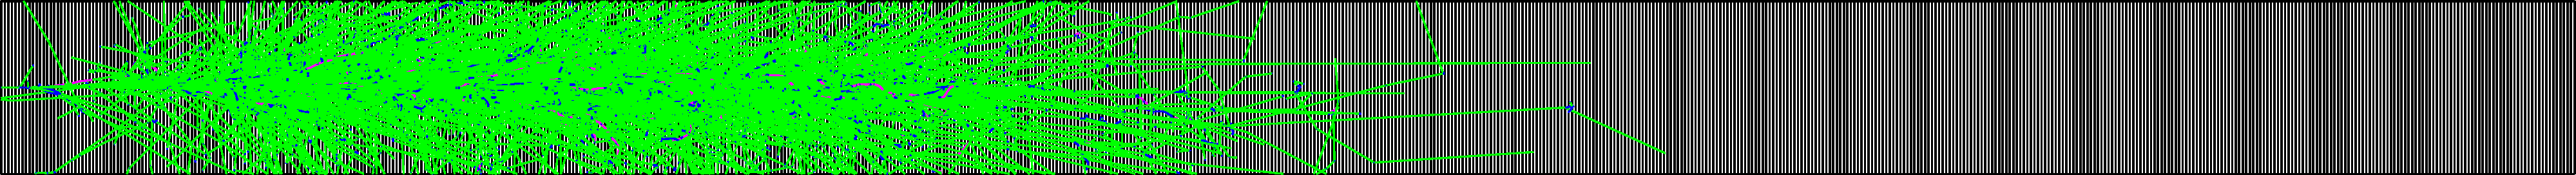

now at absorber thickness 0.03 cm.
/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Running at energy 1.0 GeV.
Running at energy 4.0 GeV.
Running at energy 7.0 GeV.
Running at energy 10.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destinat

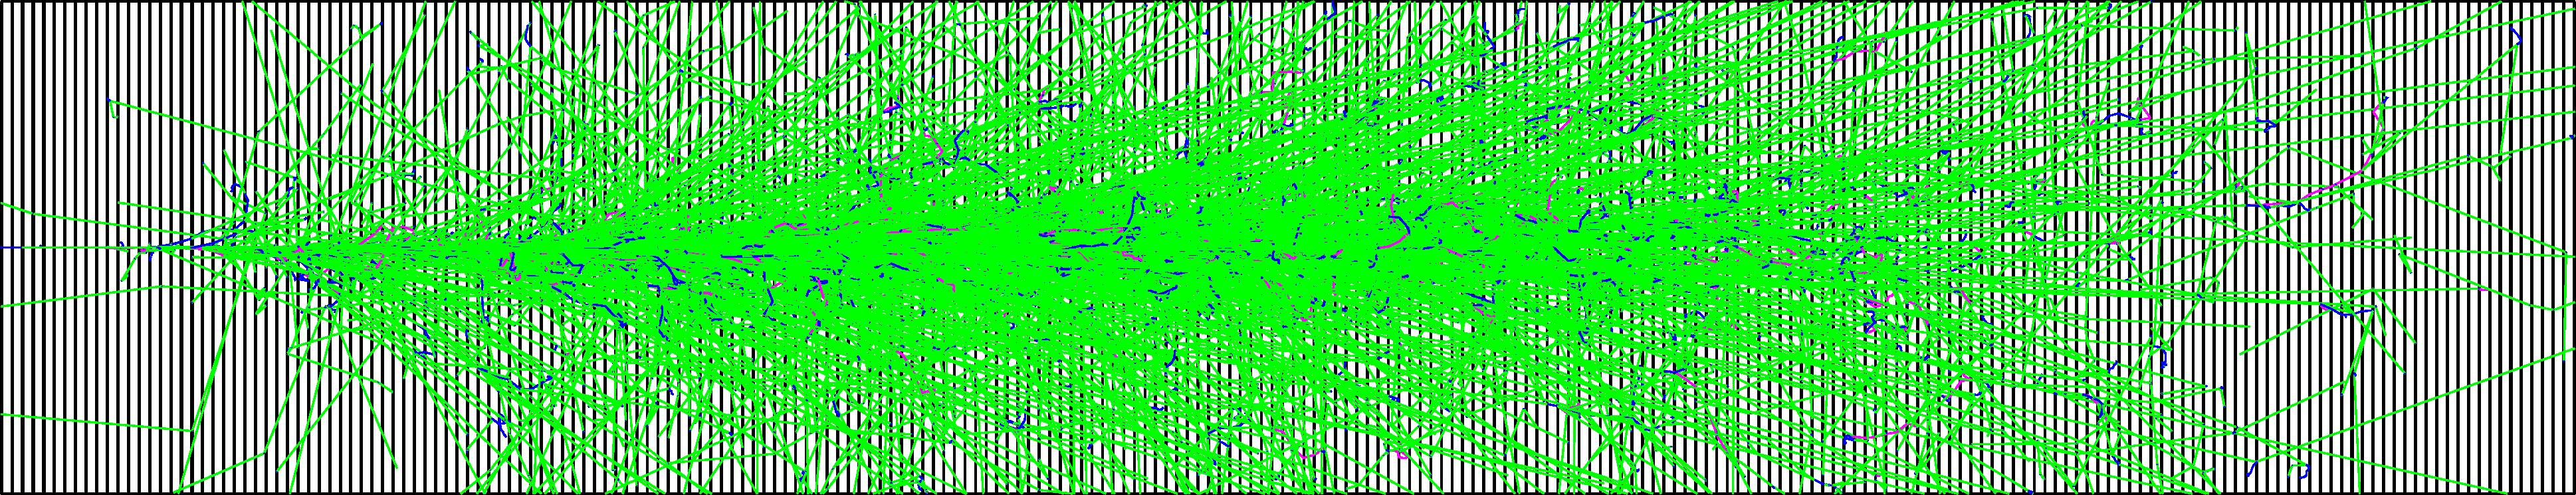

now at absorber thickness 0.05 cm.
/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Running at energy 1.0 GeV.
Running at energy 4.0 GeV.
Running at energy 7.0 GeV.
Running at energy 10.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destinat

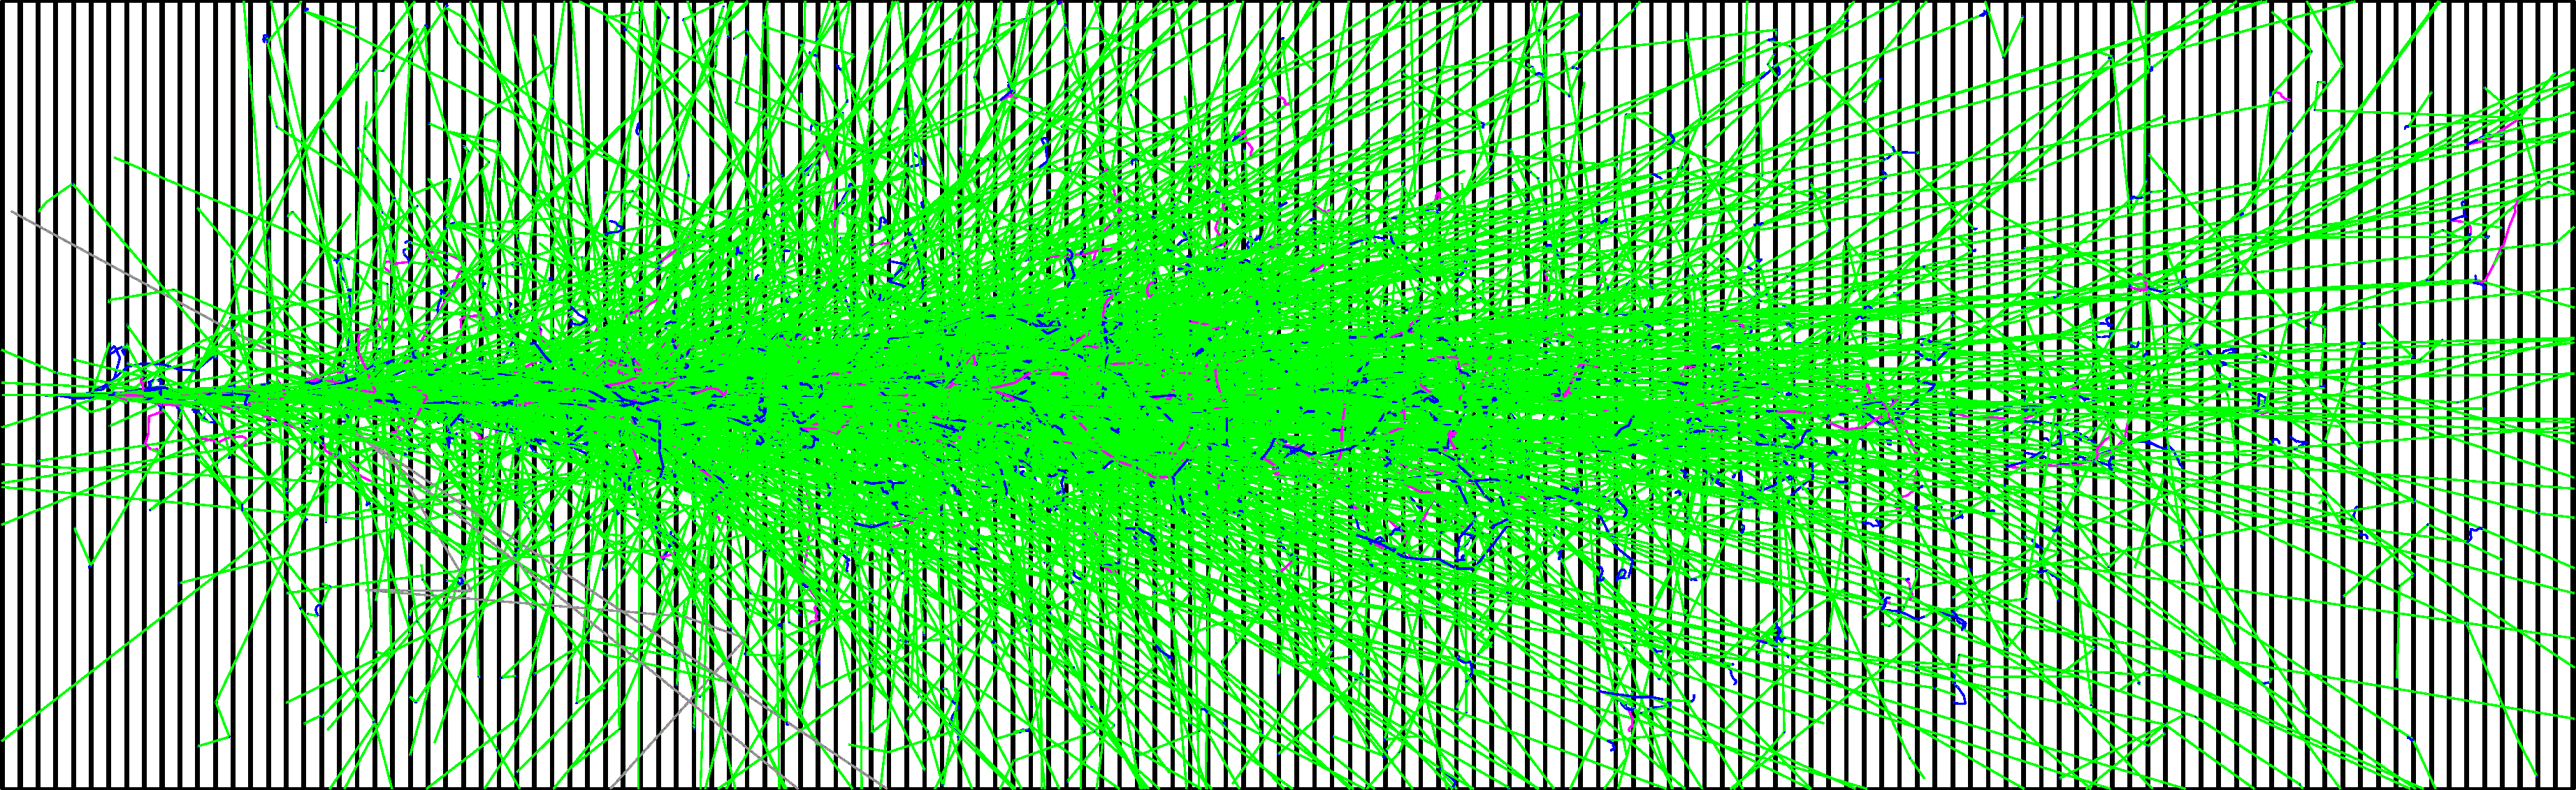

now at absorber thickness 0.11 cm.
/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Running at energy 1.0 GeV.
Running at energy 4.0 GeV.
Running at energy 7.0 GeV.
Running at energy 10.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destinat

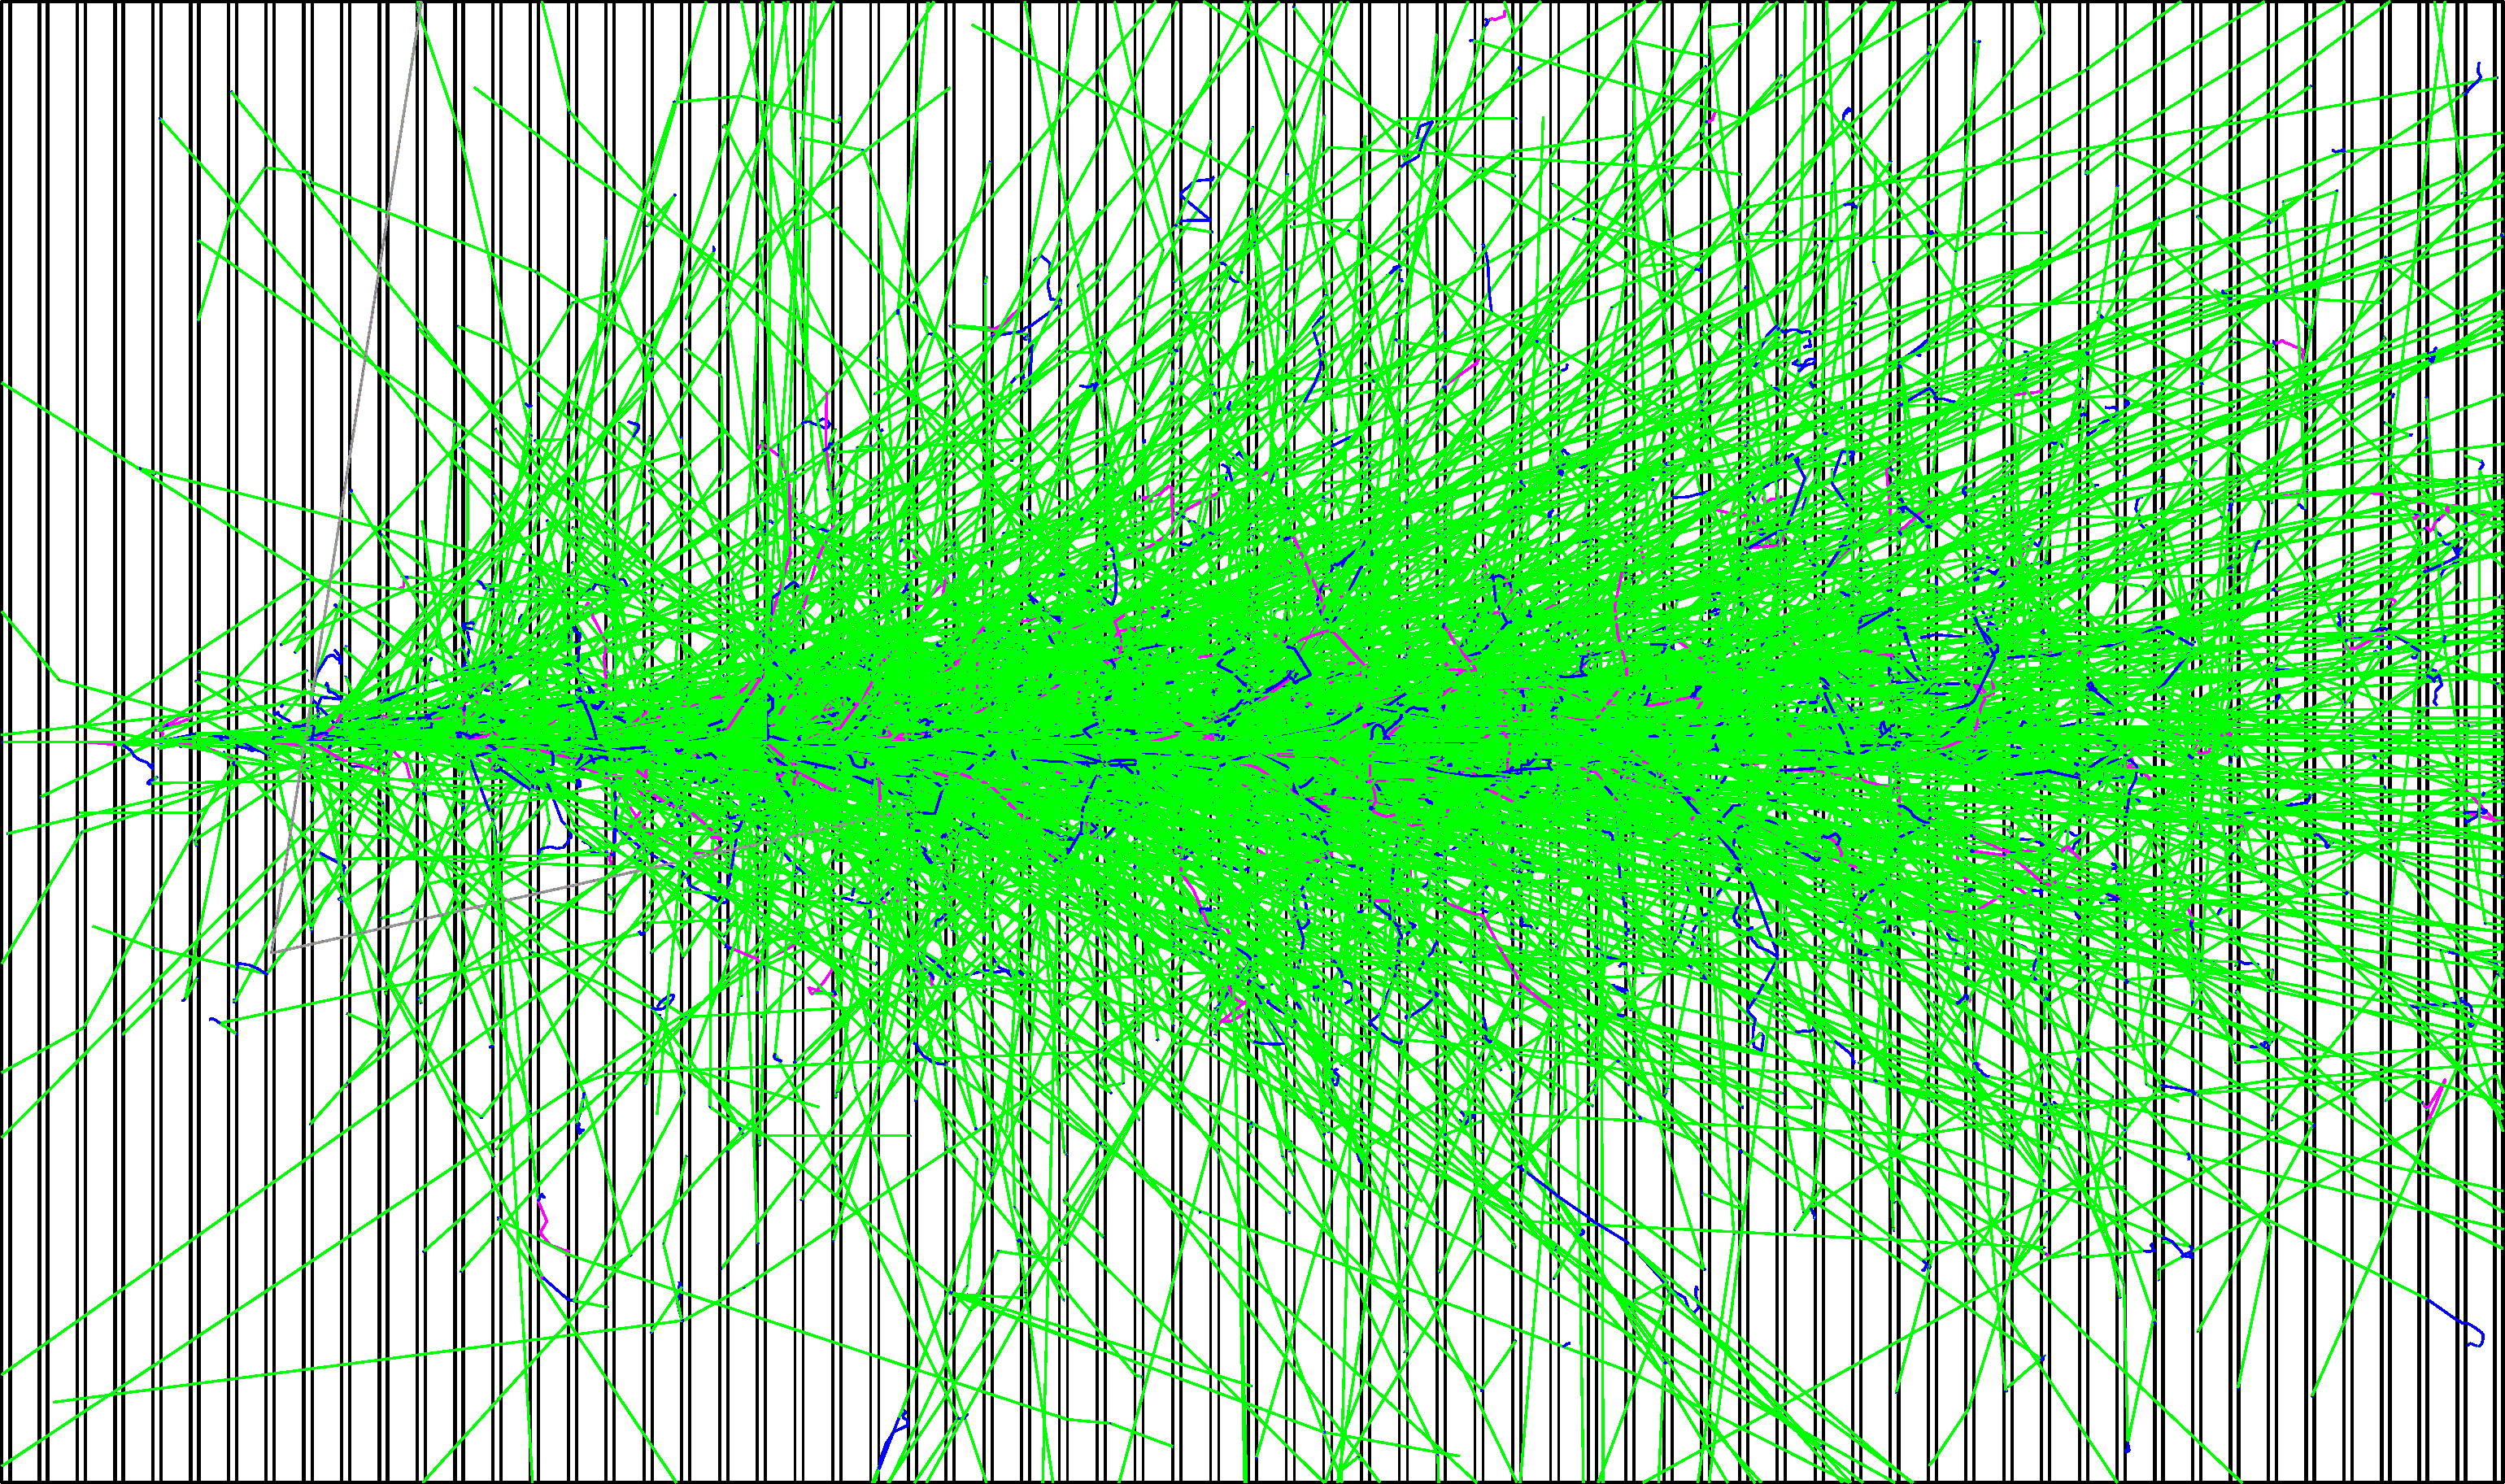

now at absorber thickness 0.22 cm.
/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Running at energy 1.0 GeV.
Running at energy 4.0 GeV.
Running at energy 7.0 GeV.
Running at energy 10.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destinat

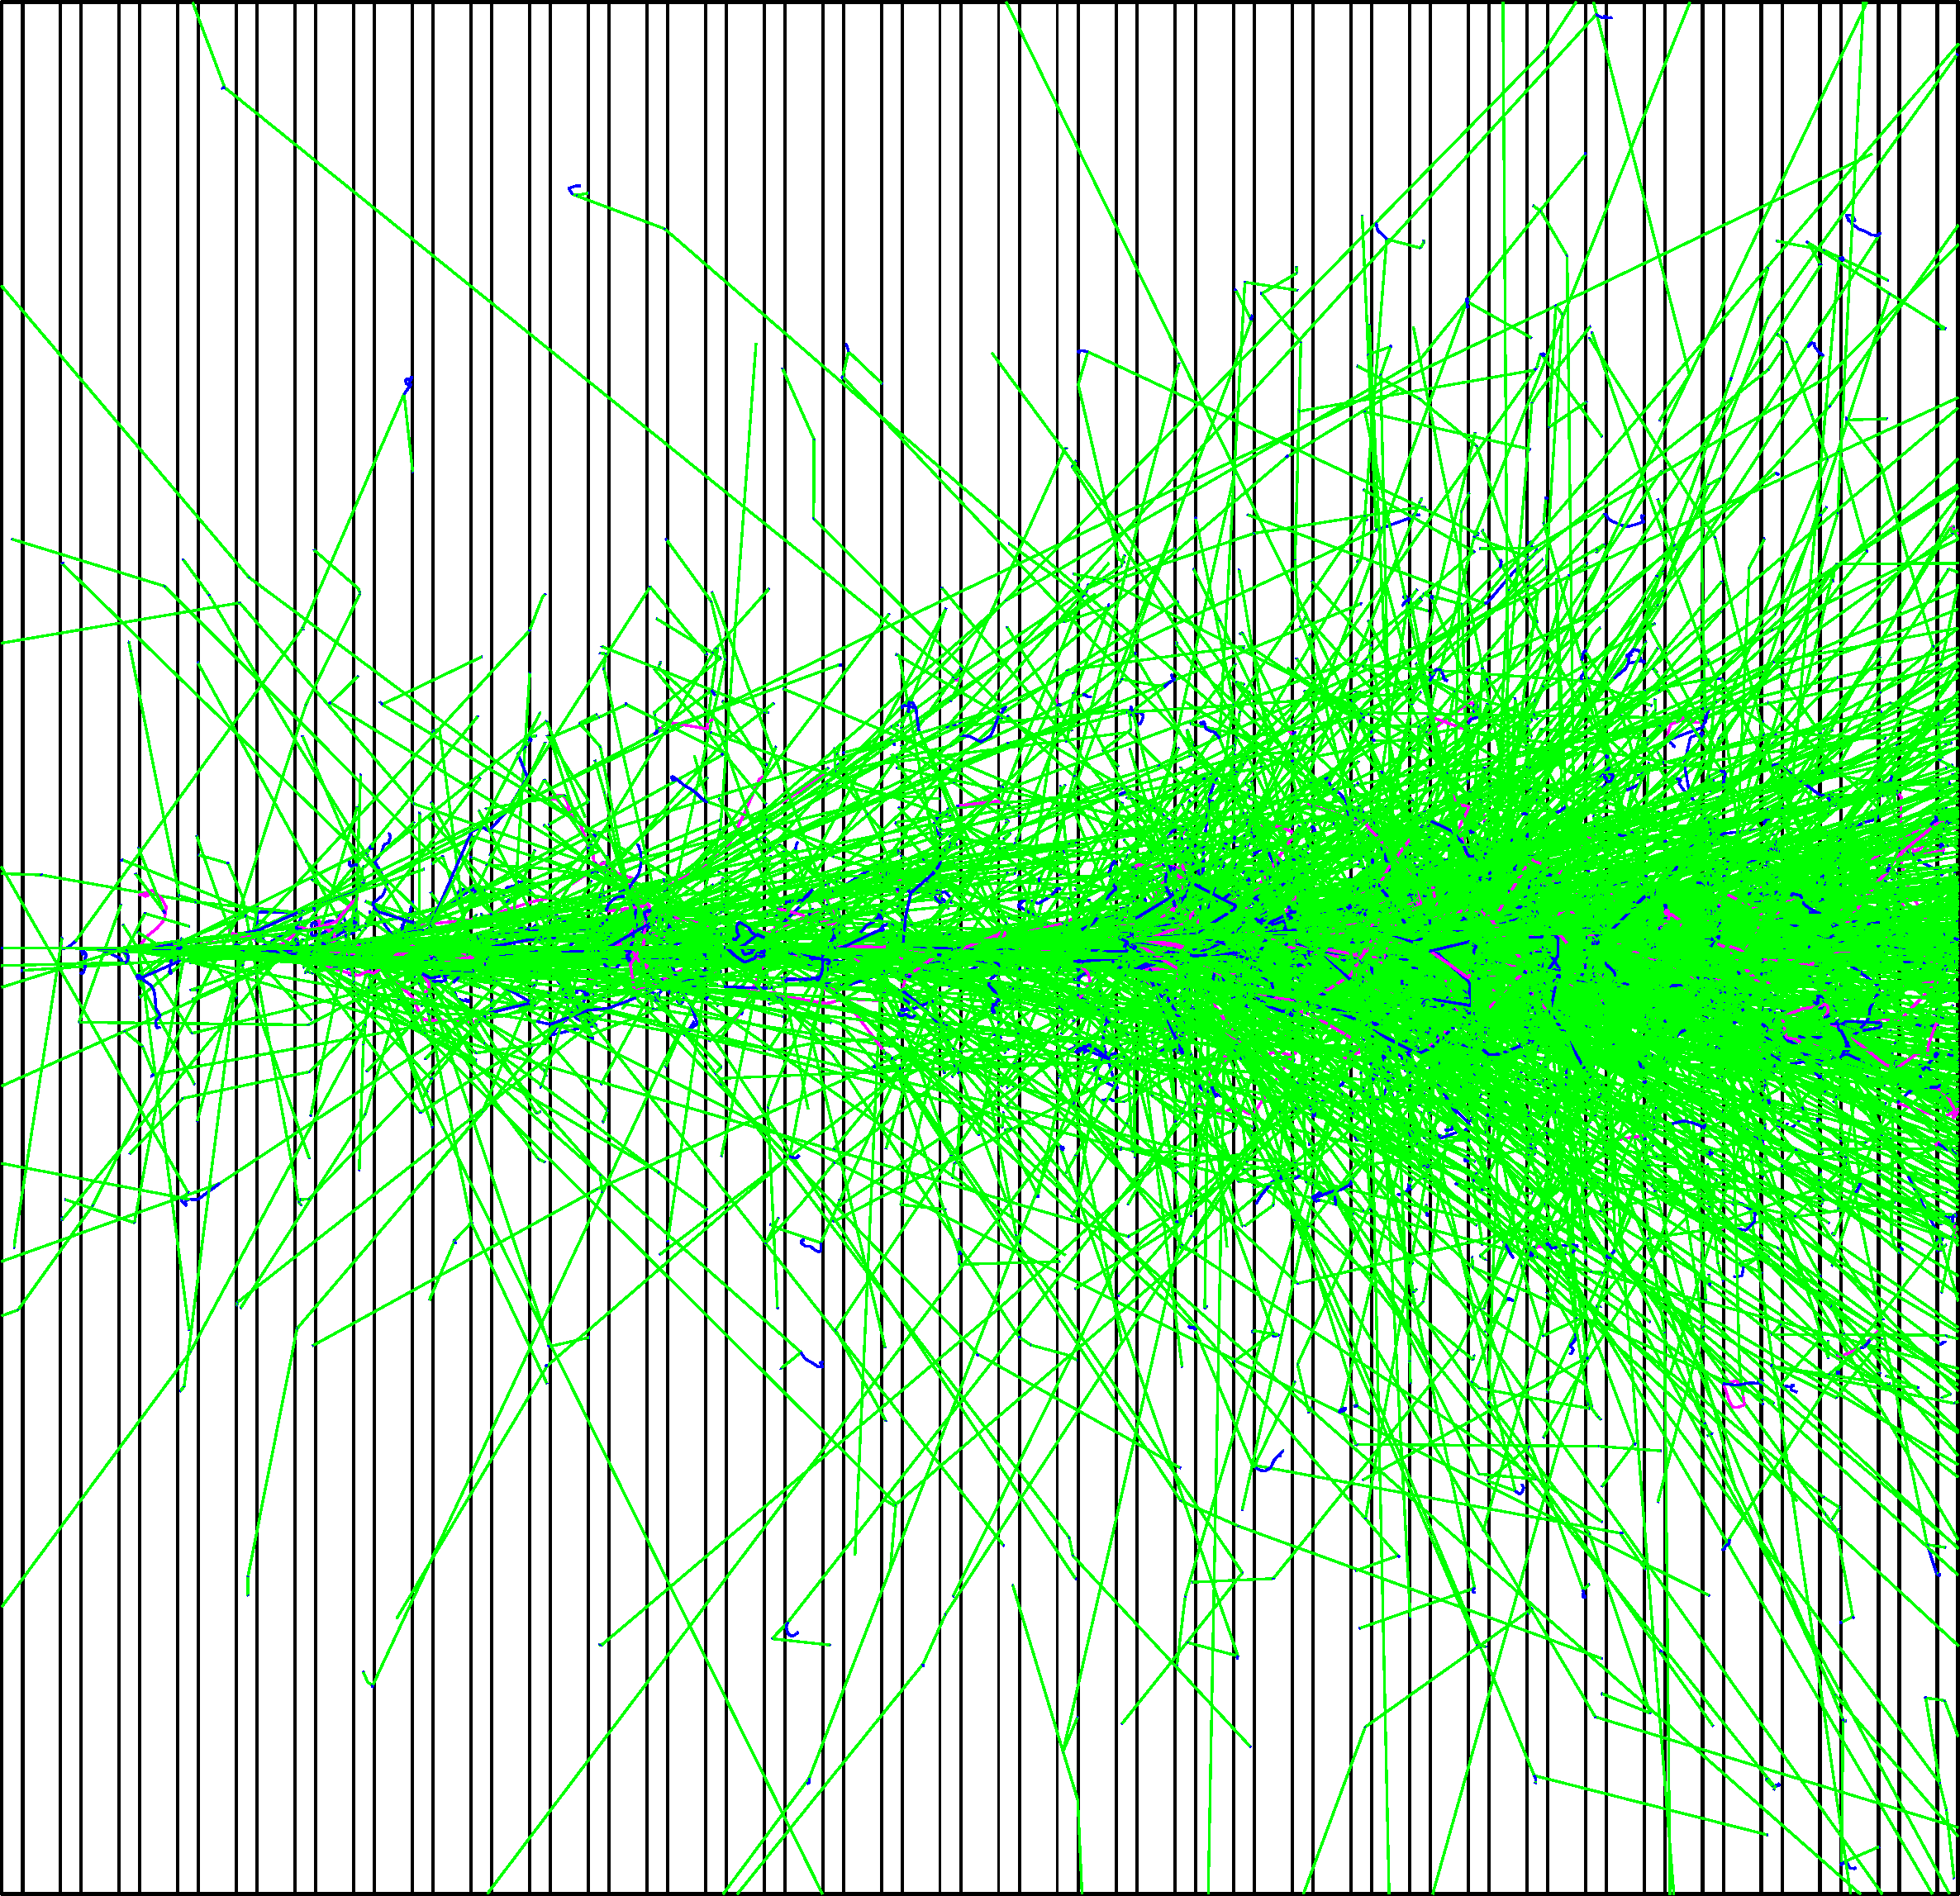

now at absorber thickness 0.33 cm.
/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Running at energy 1.0 GeV.
Running at energy 4.0 GeV.
Running at energy 7.0 GeV.
Running at energy 10.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destinat

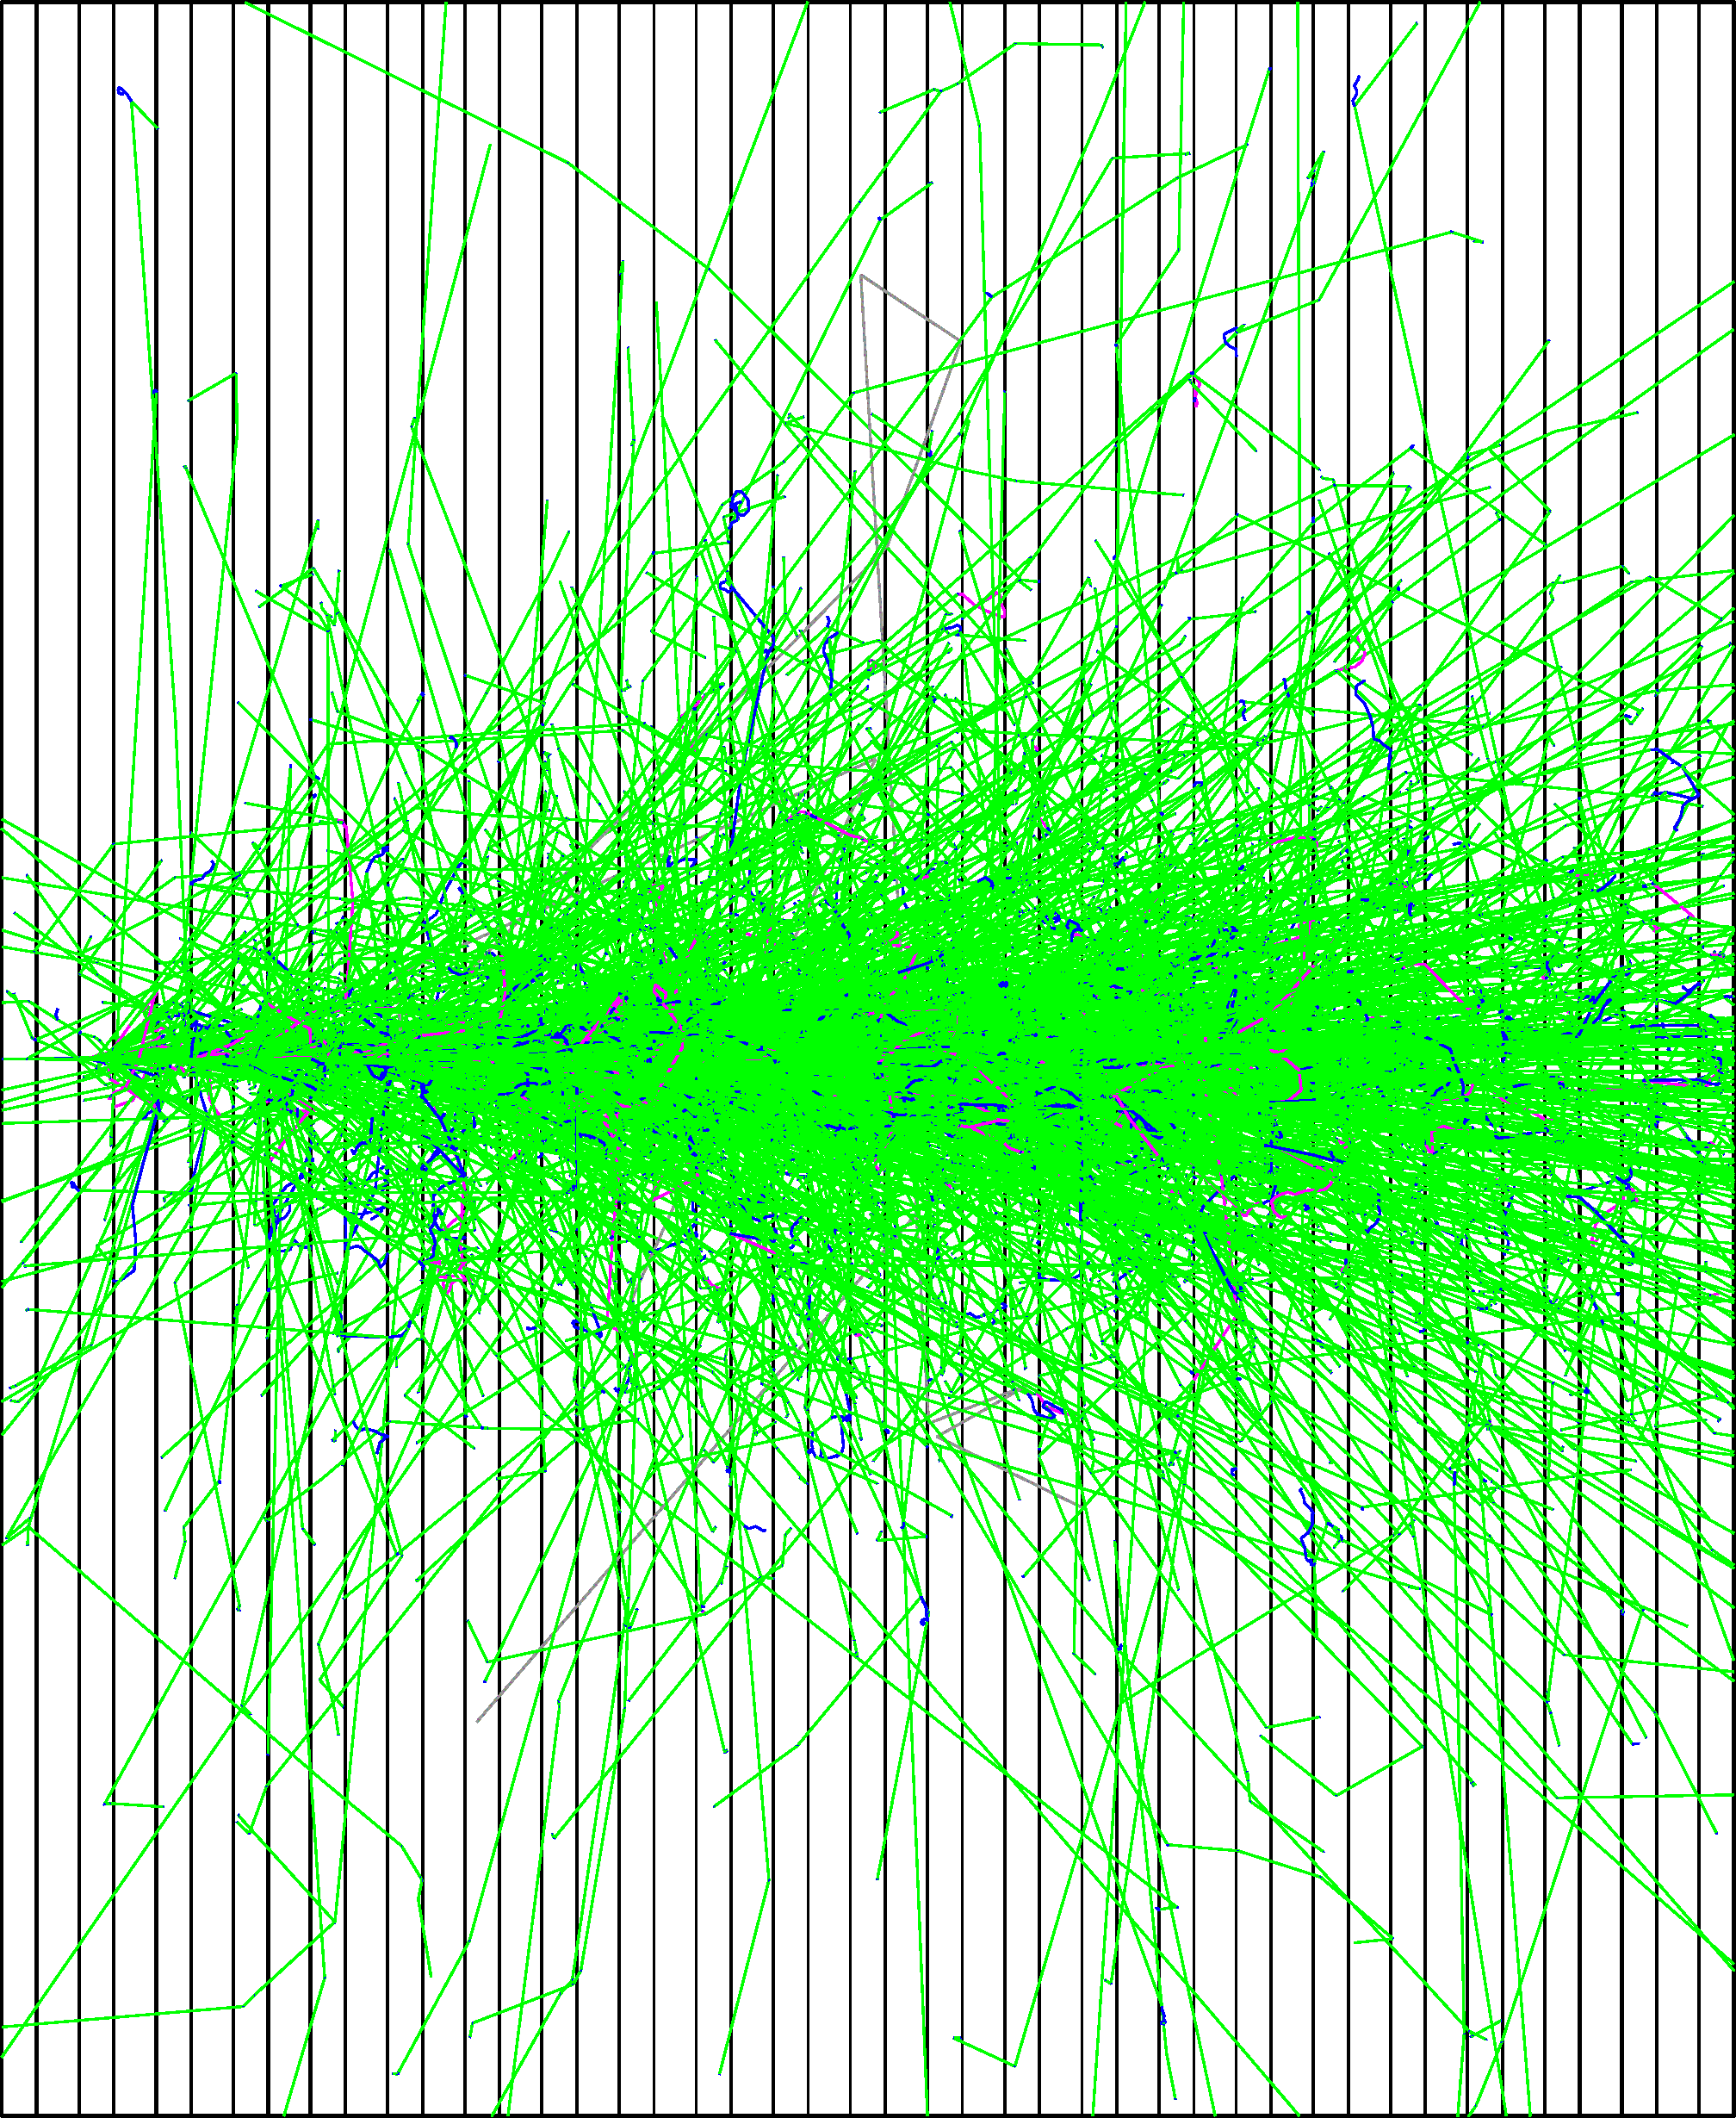

now at absorber thickness 0.44 cm.
/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Running at energy 1.0 GeV.
Running at energy 4.0 GeV.
Running at energy 7.0 GeV.
Running at energy 10.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destinat

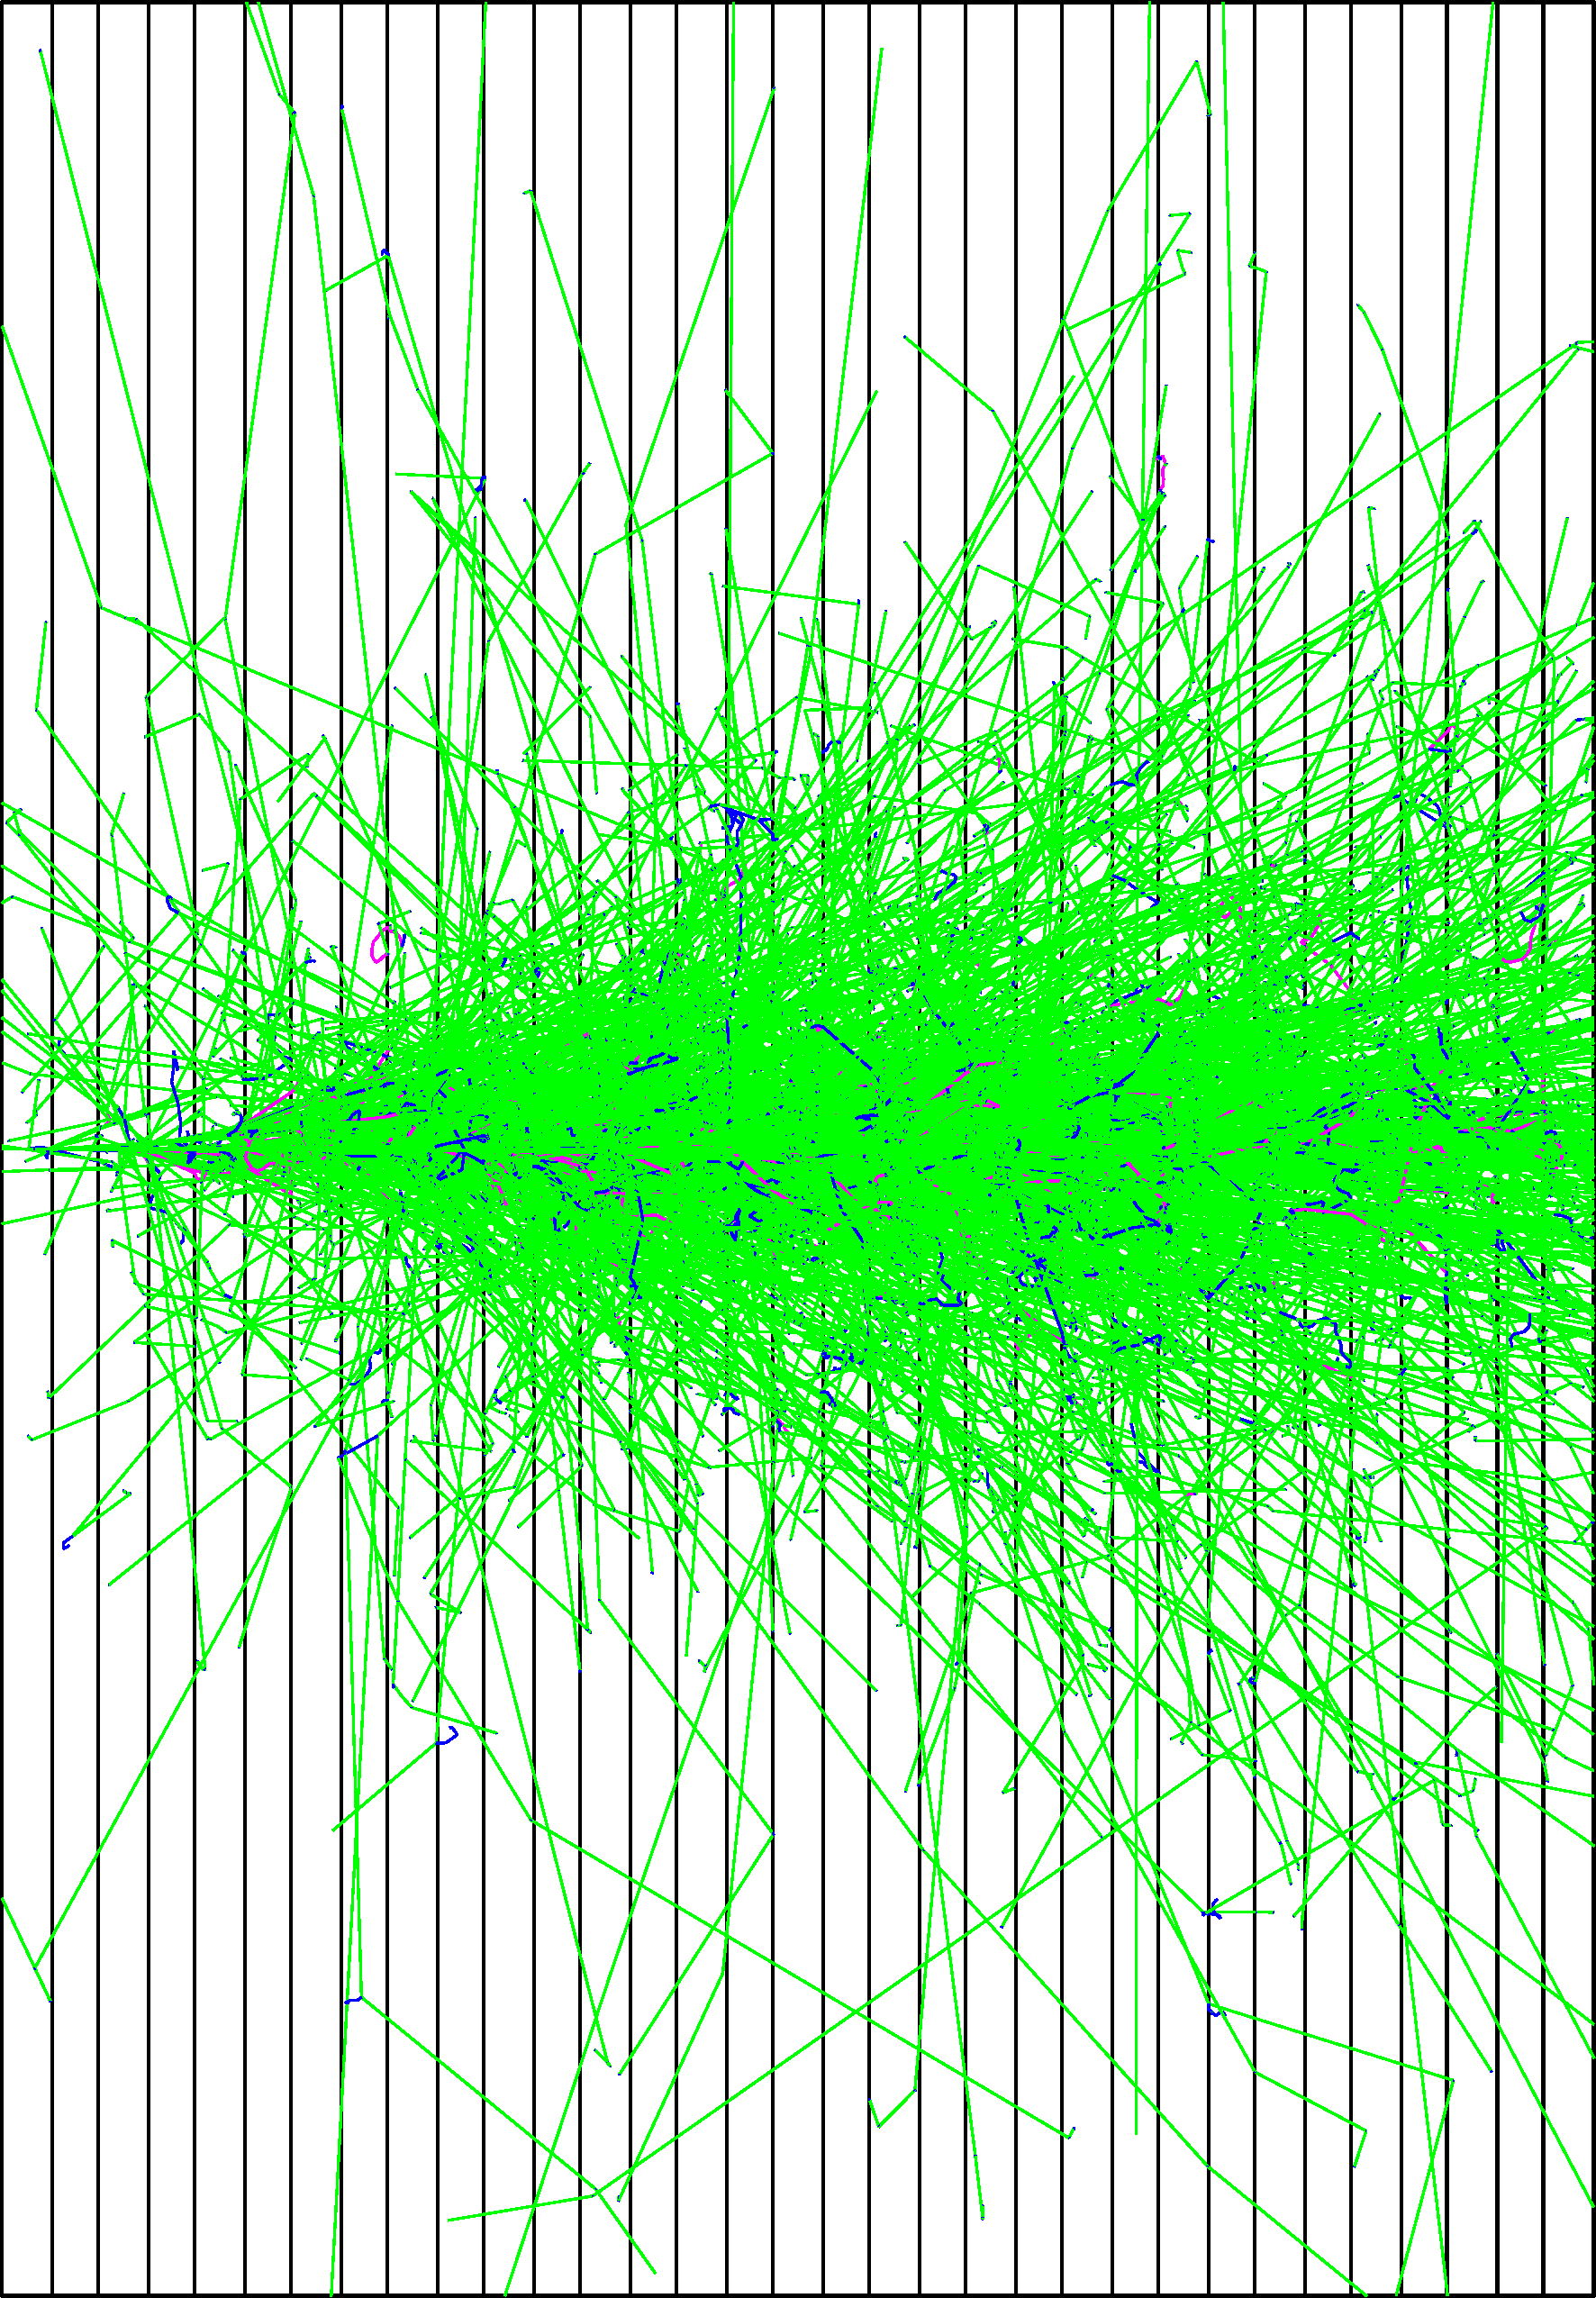

now at absorber thickness 0.55 cm.
/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Running at energy 1.0 GeV.
Running at energy 4.0 GeV.
Running at energy 7.0 GeV.
Running at energy 10.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destinat

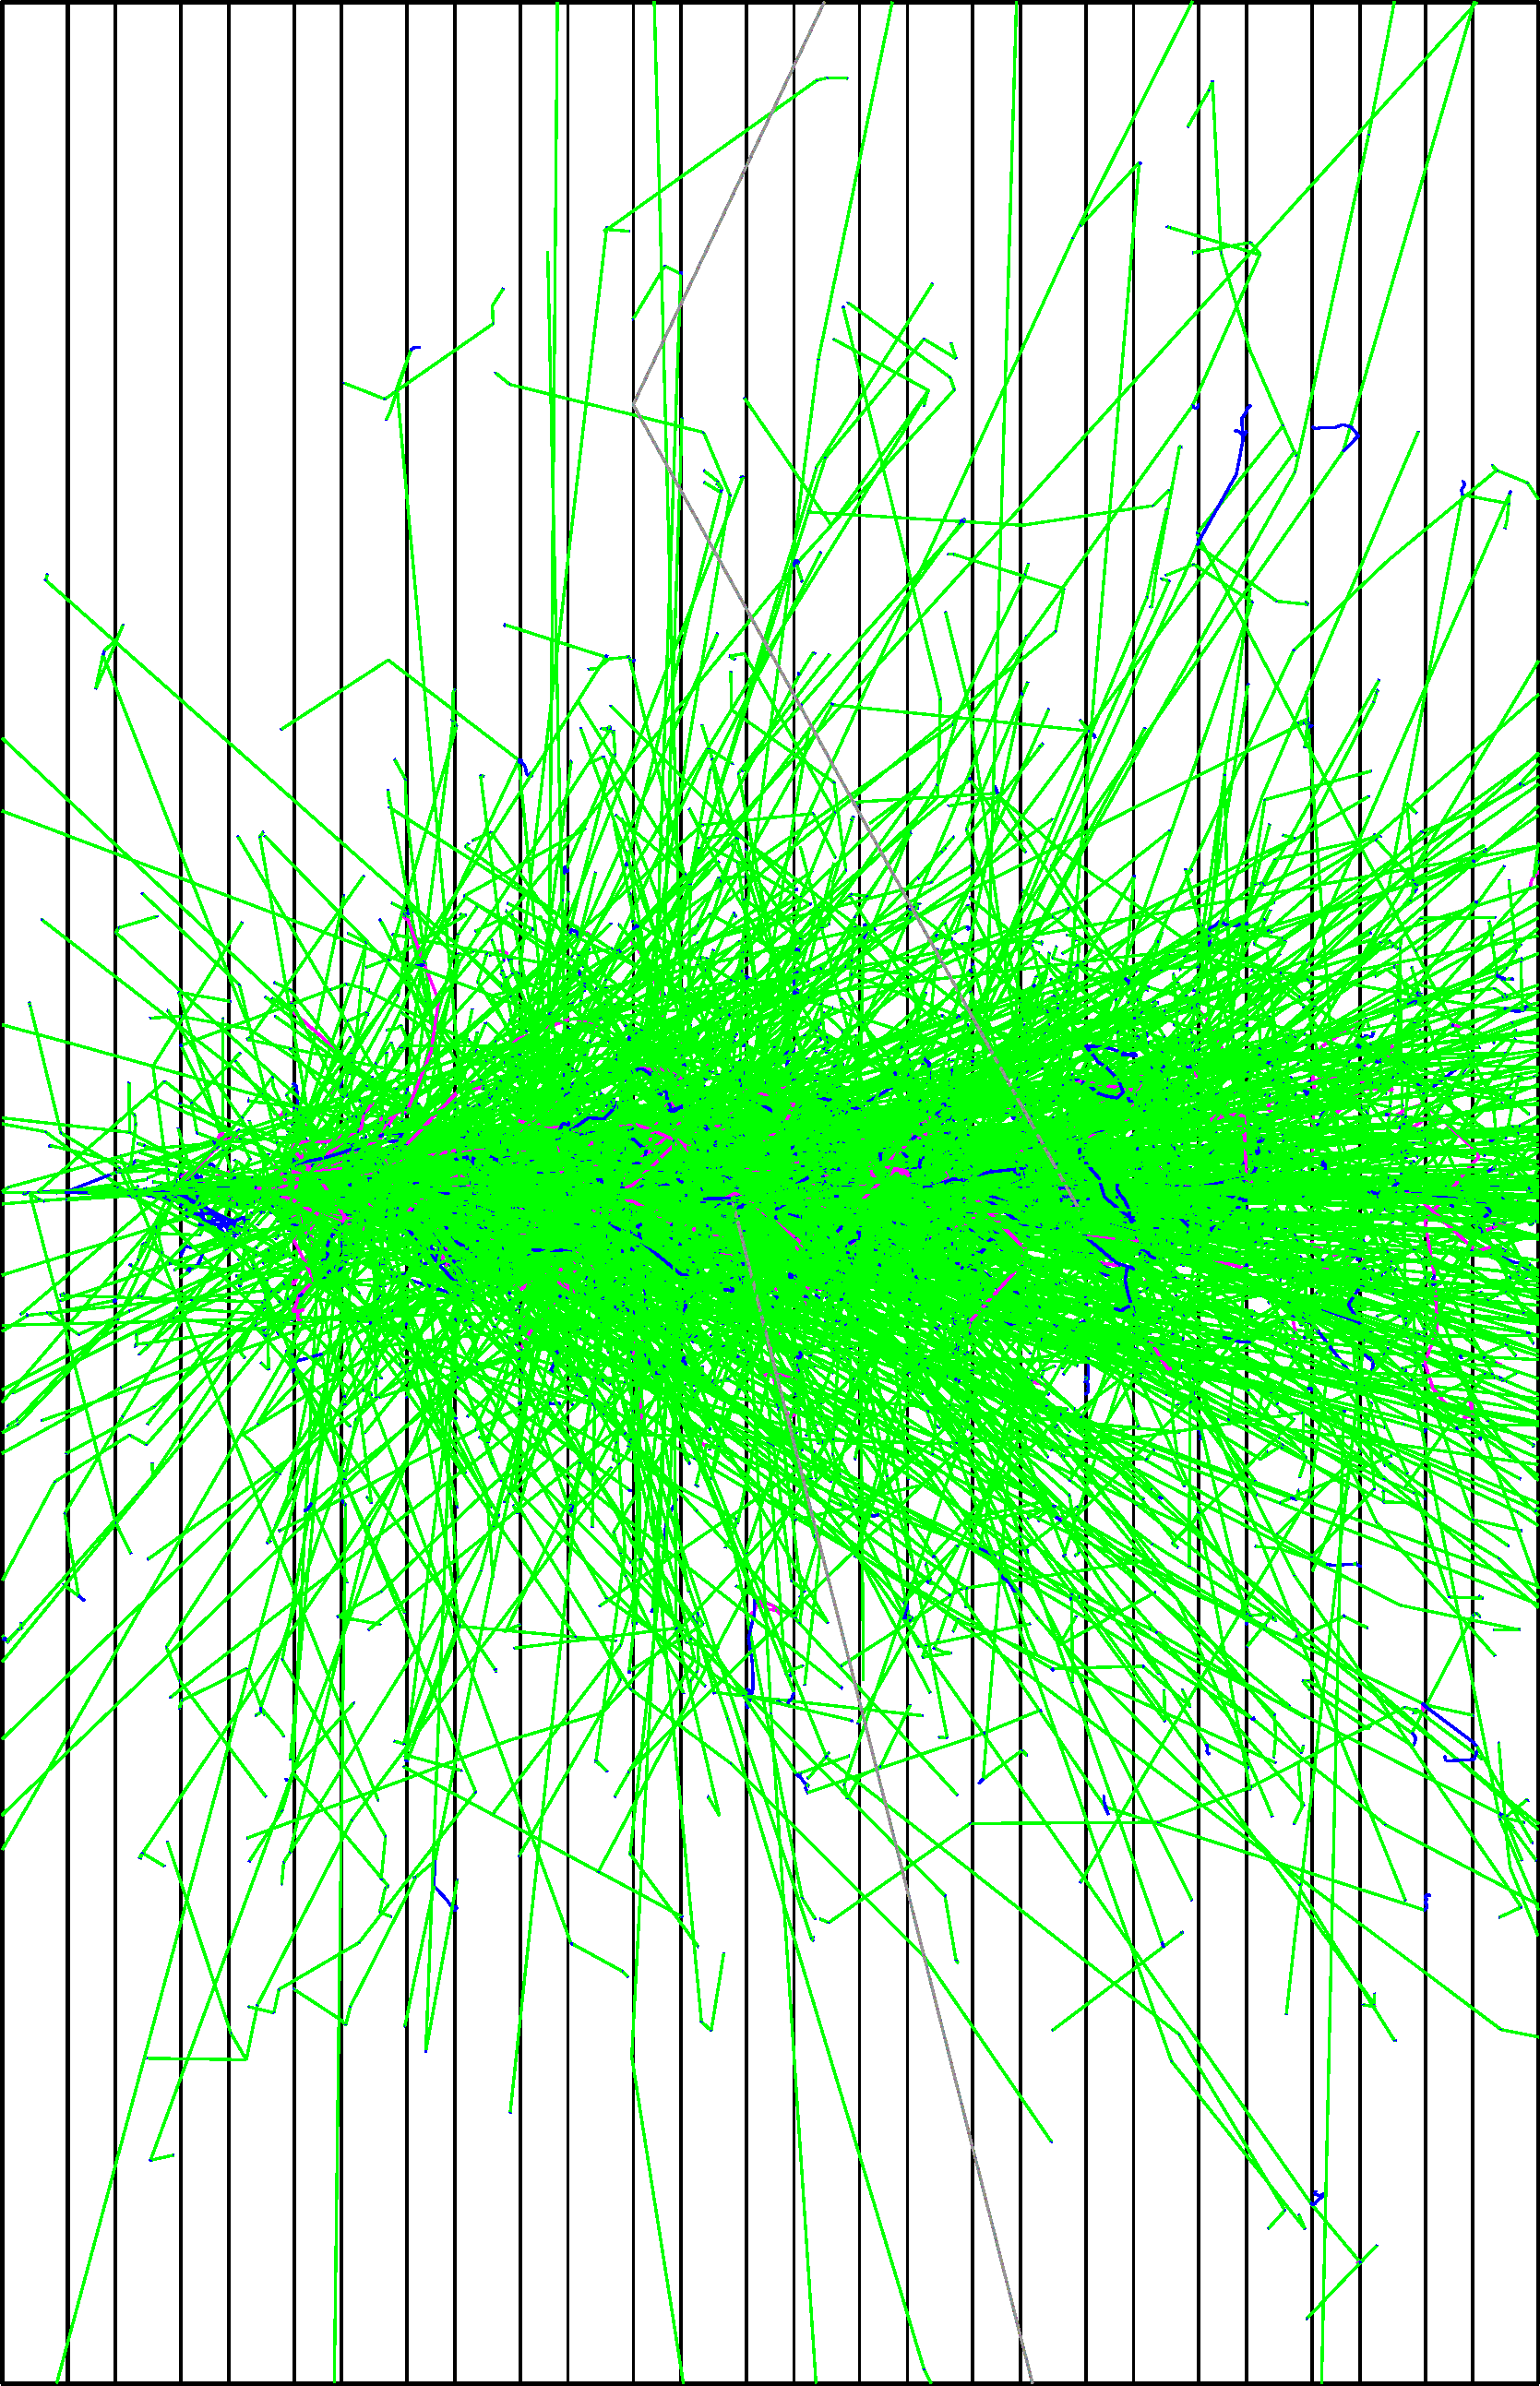

now at absorber thickness 0.66 cm.
/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Running at energy 1.0 GeV.
Running at energy 4.0 GeV.
Running at energy 7.0 GeV.
Running at energy 10.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destinat

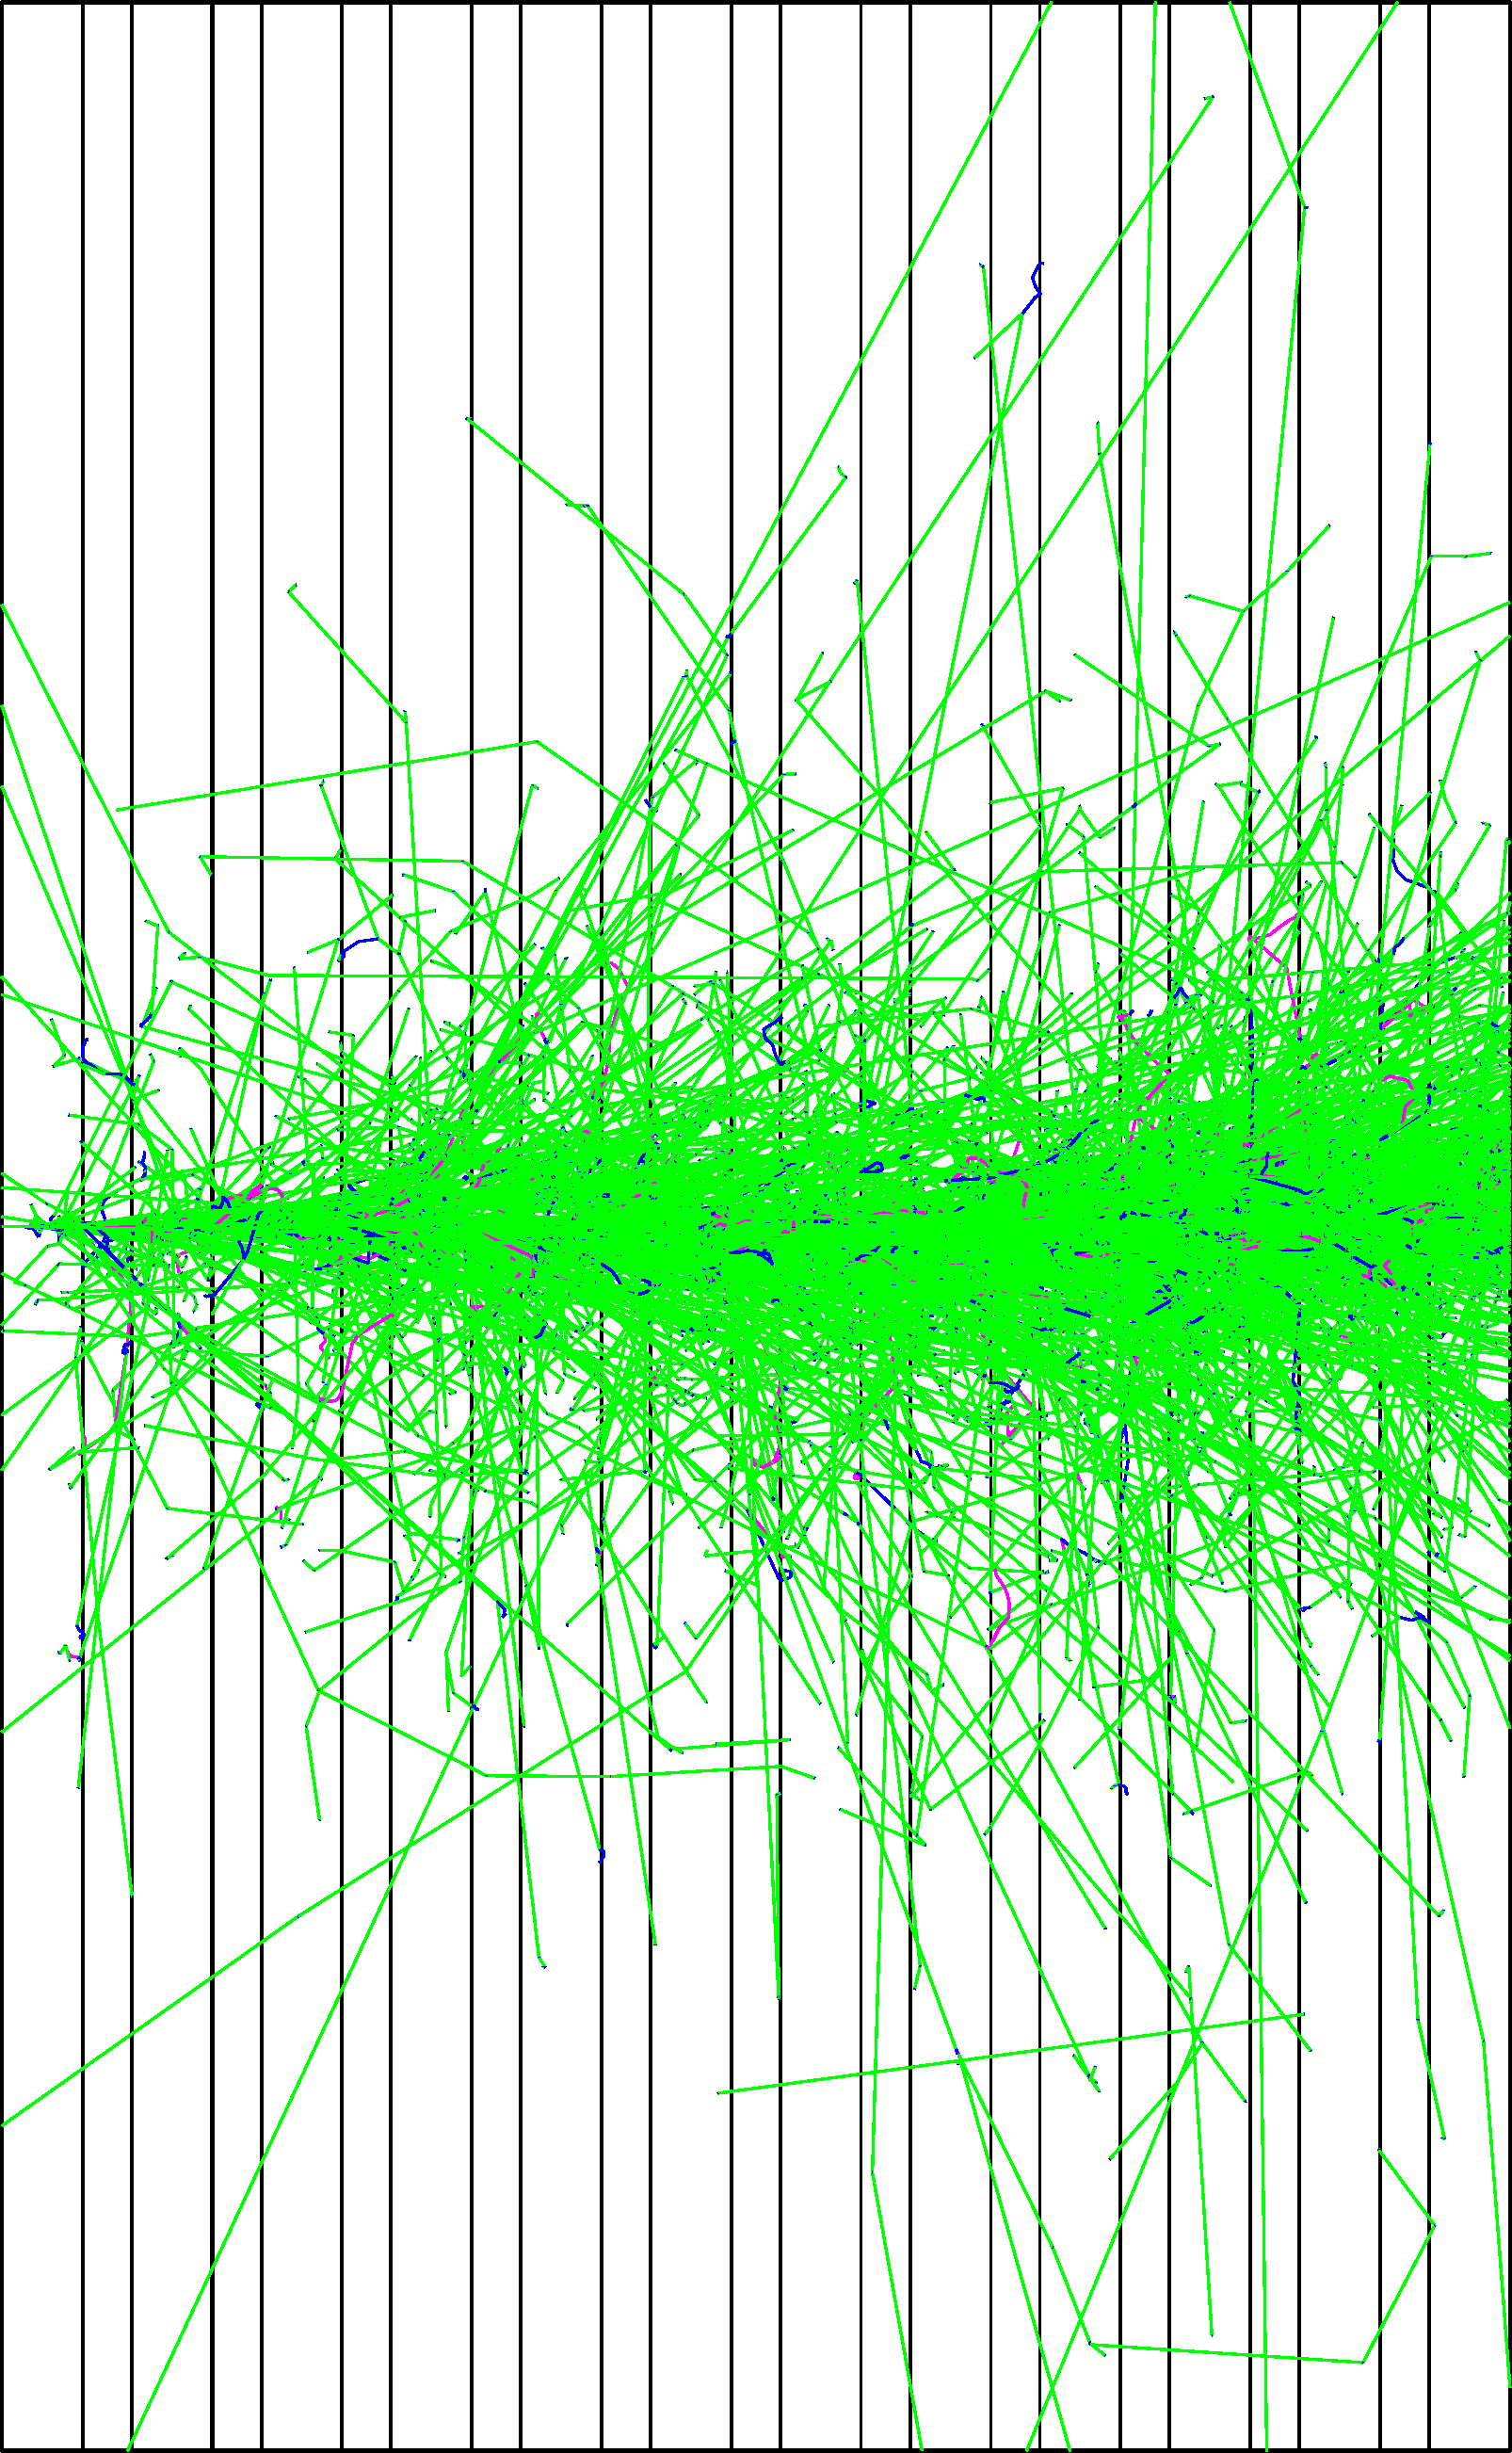

now at absorber thickness 0.77 cm.
/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Running at energy 1.0 GeV.
Running at energy 4.0 GeV.
Running at energy 7.0 GeV.
Running at energy 10.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destinat

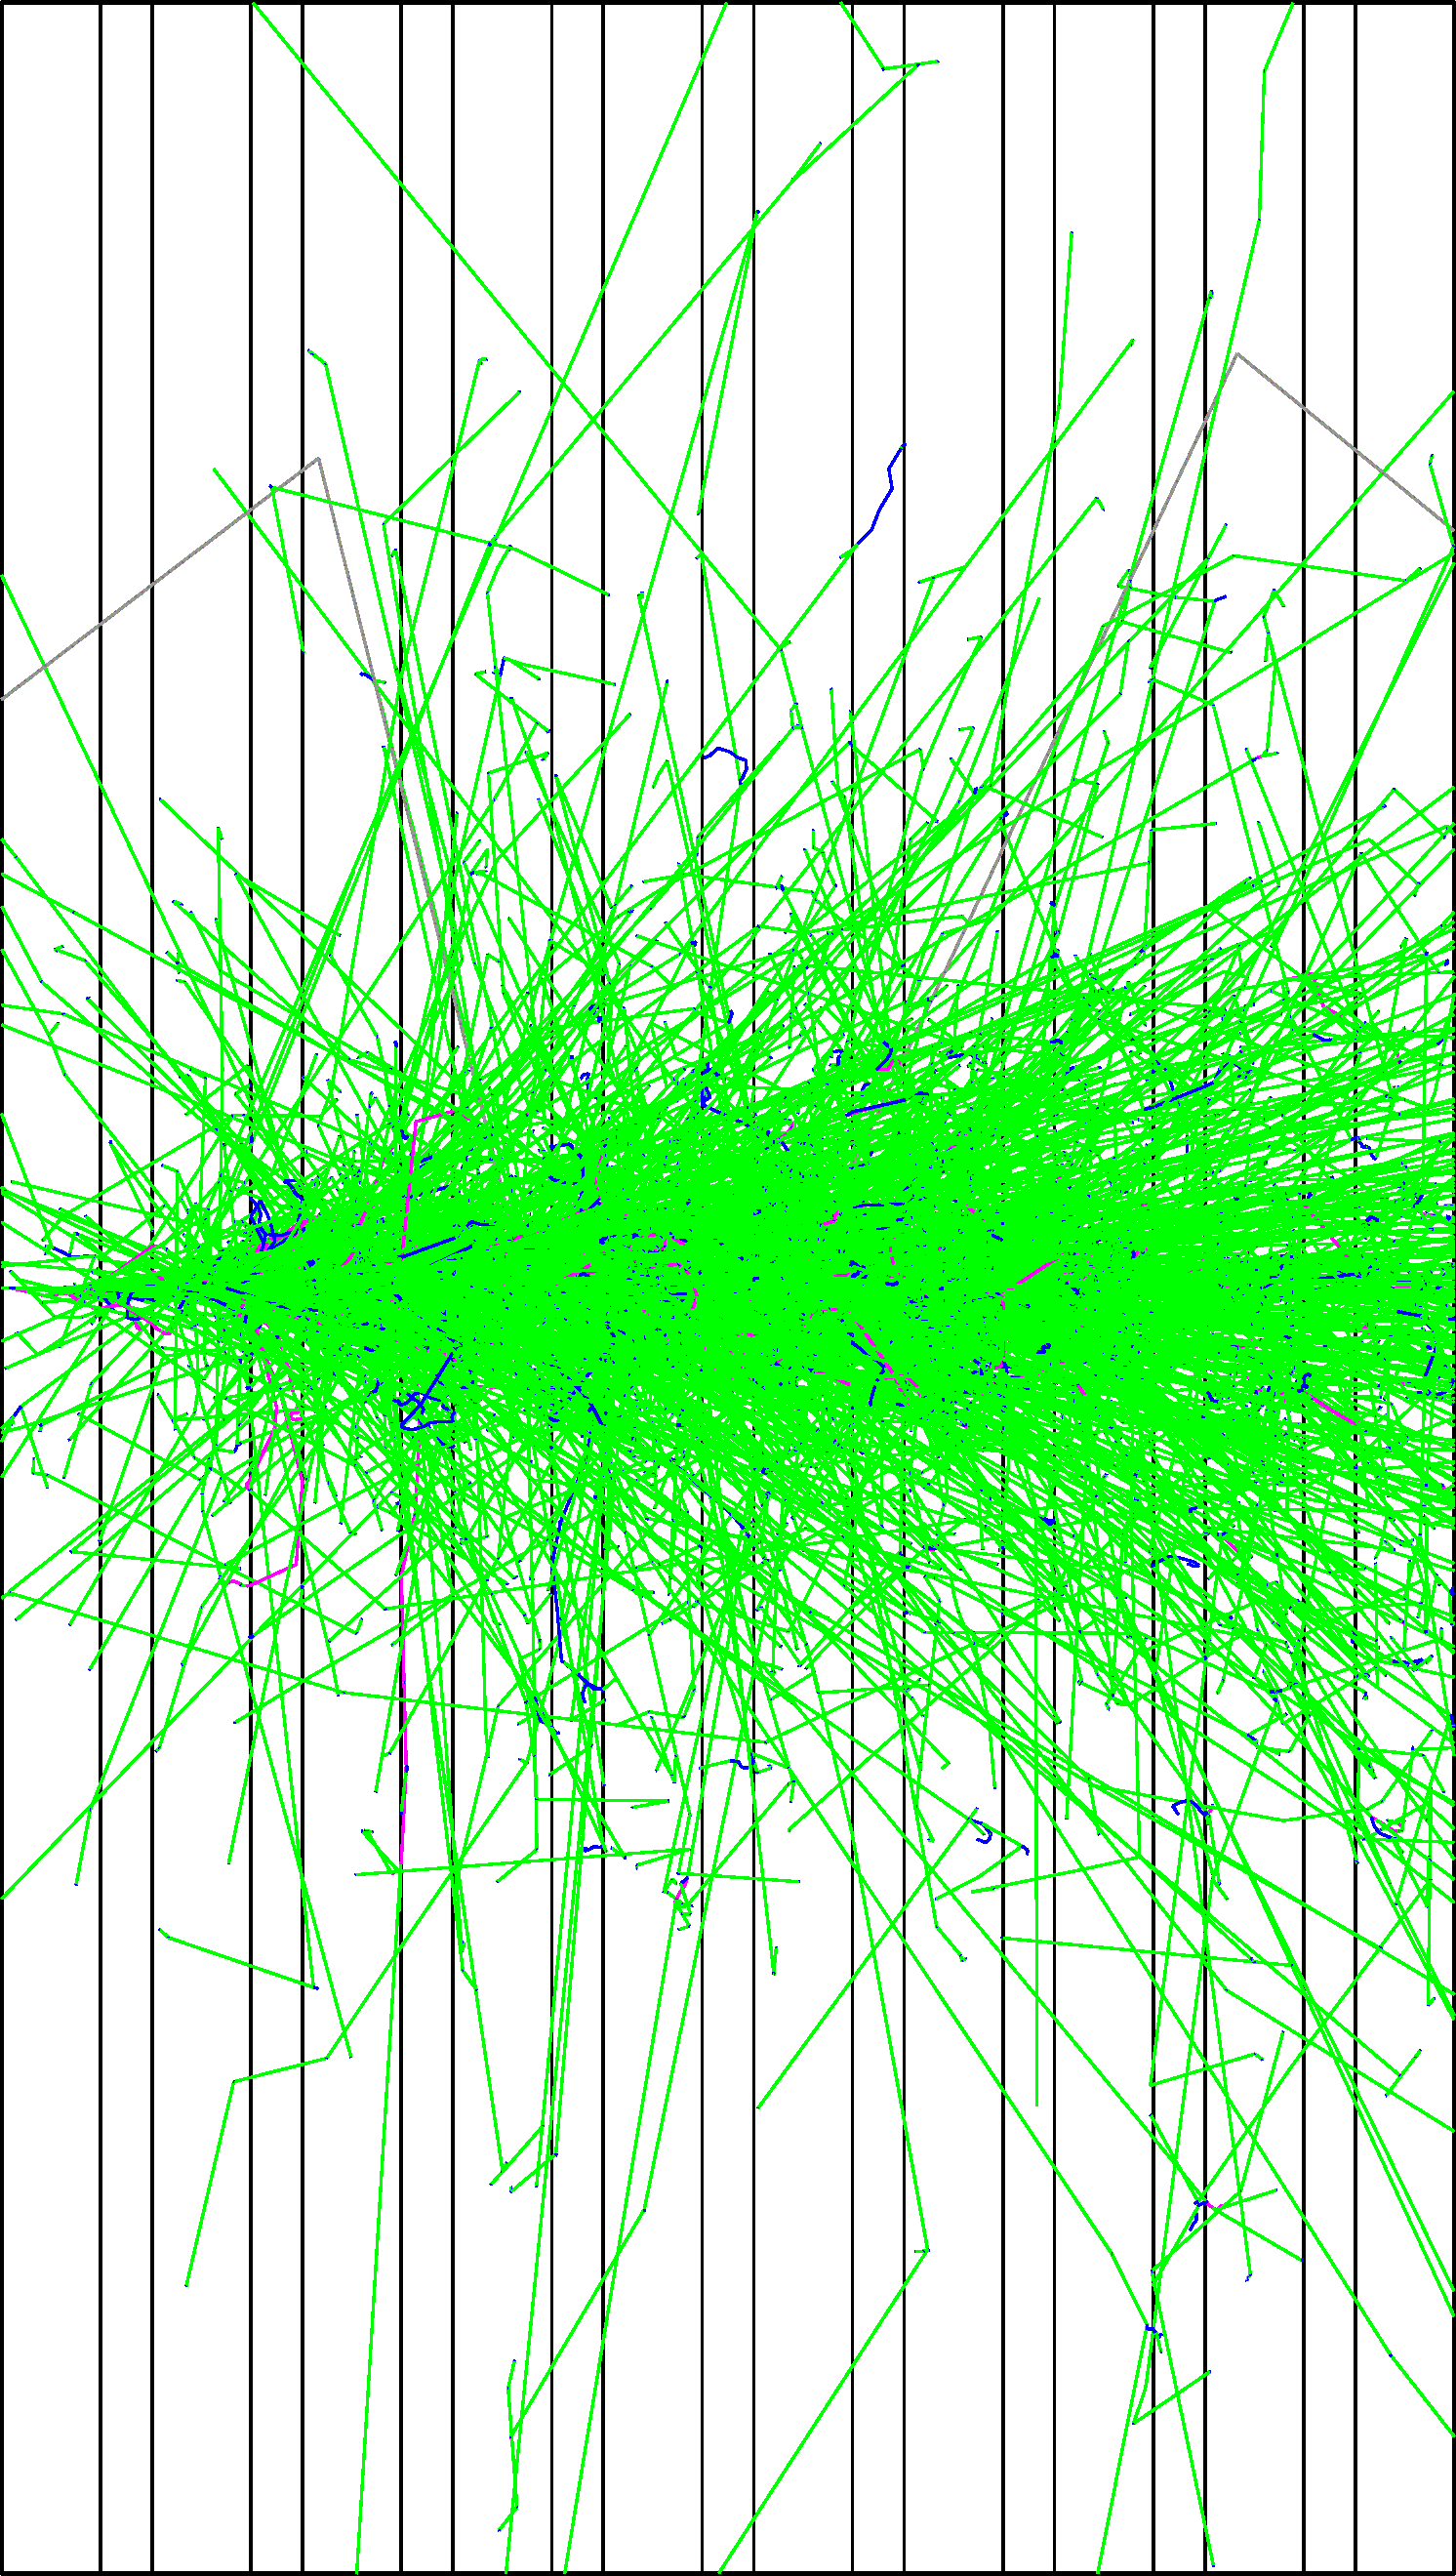

now at absorber thickness 0.88 cm.
/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Running at energy 1.0 GeV.
Running at energy 4.0 GeV.
Running at energy 7.0 GeV.
Running at energy 10.0 GeV.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destinat

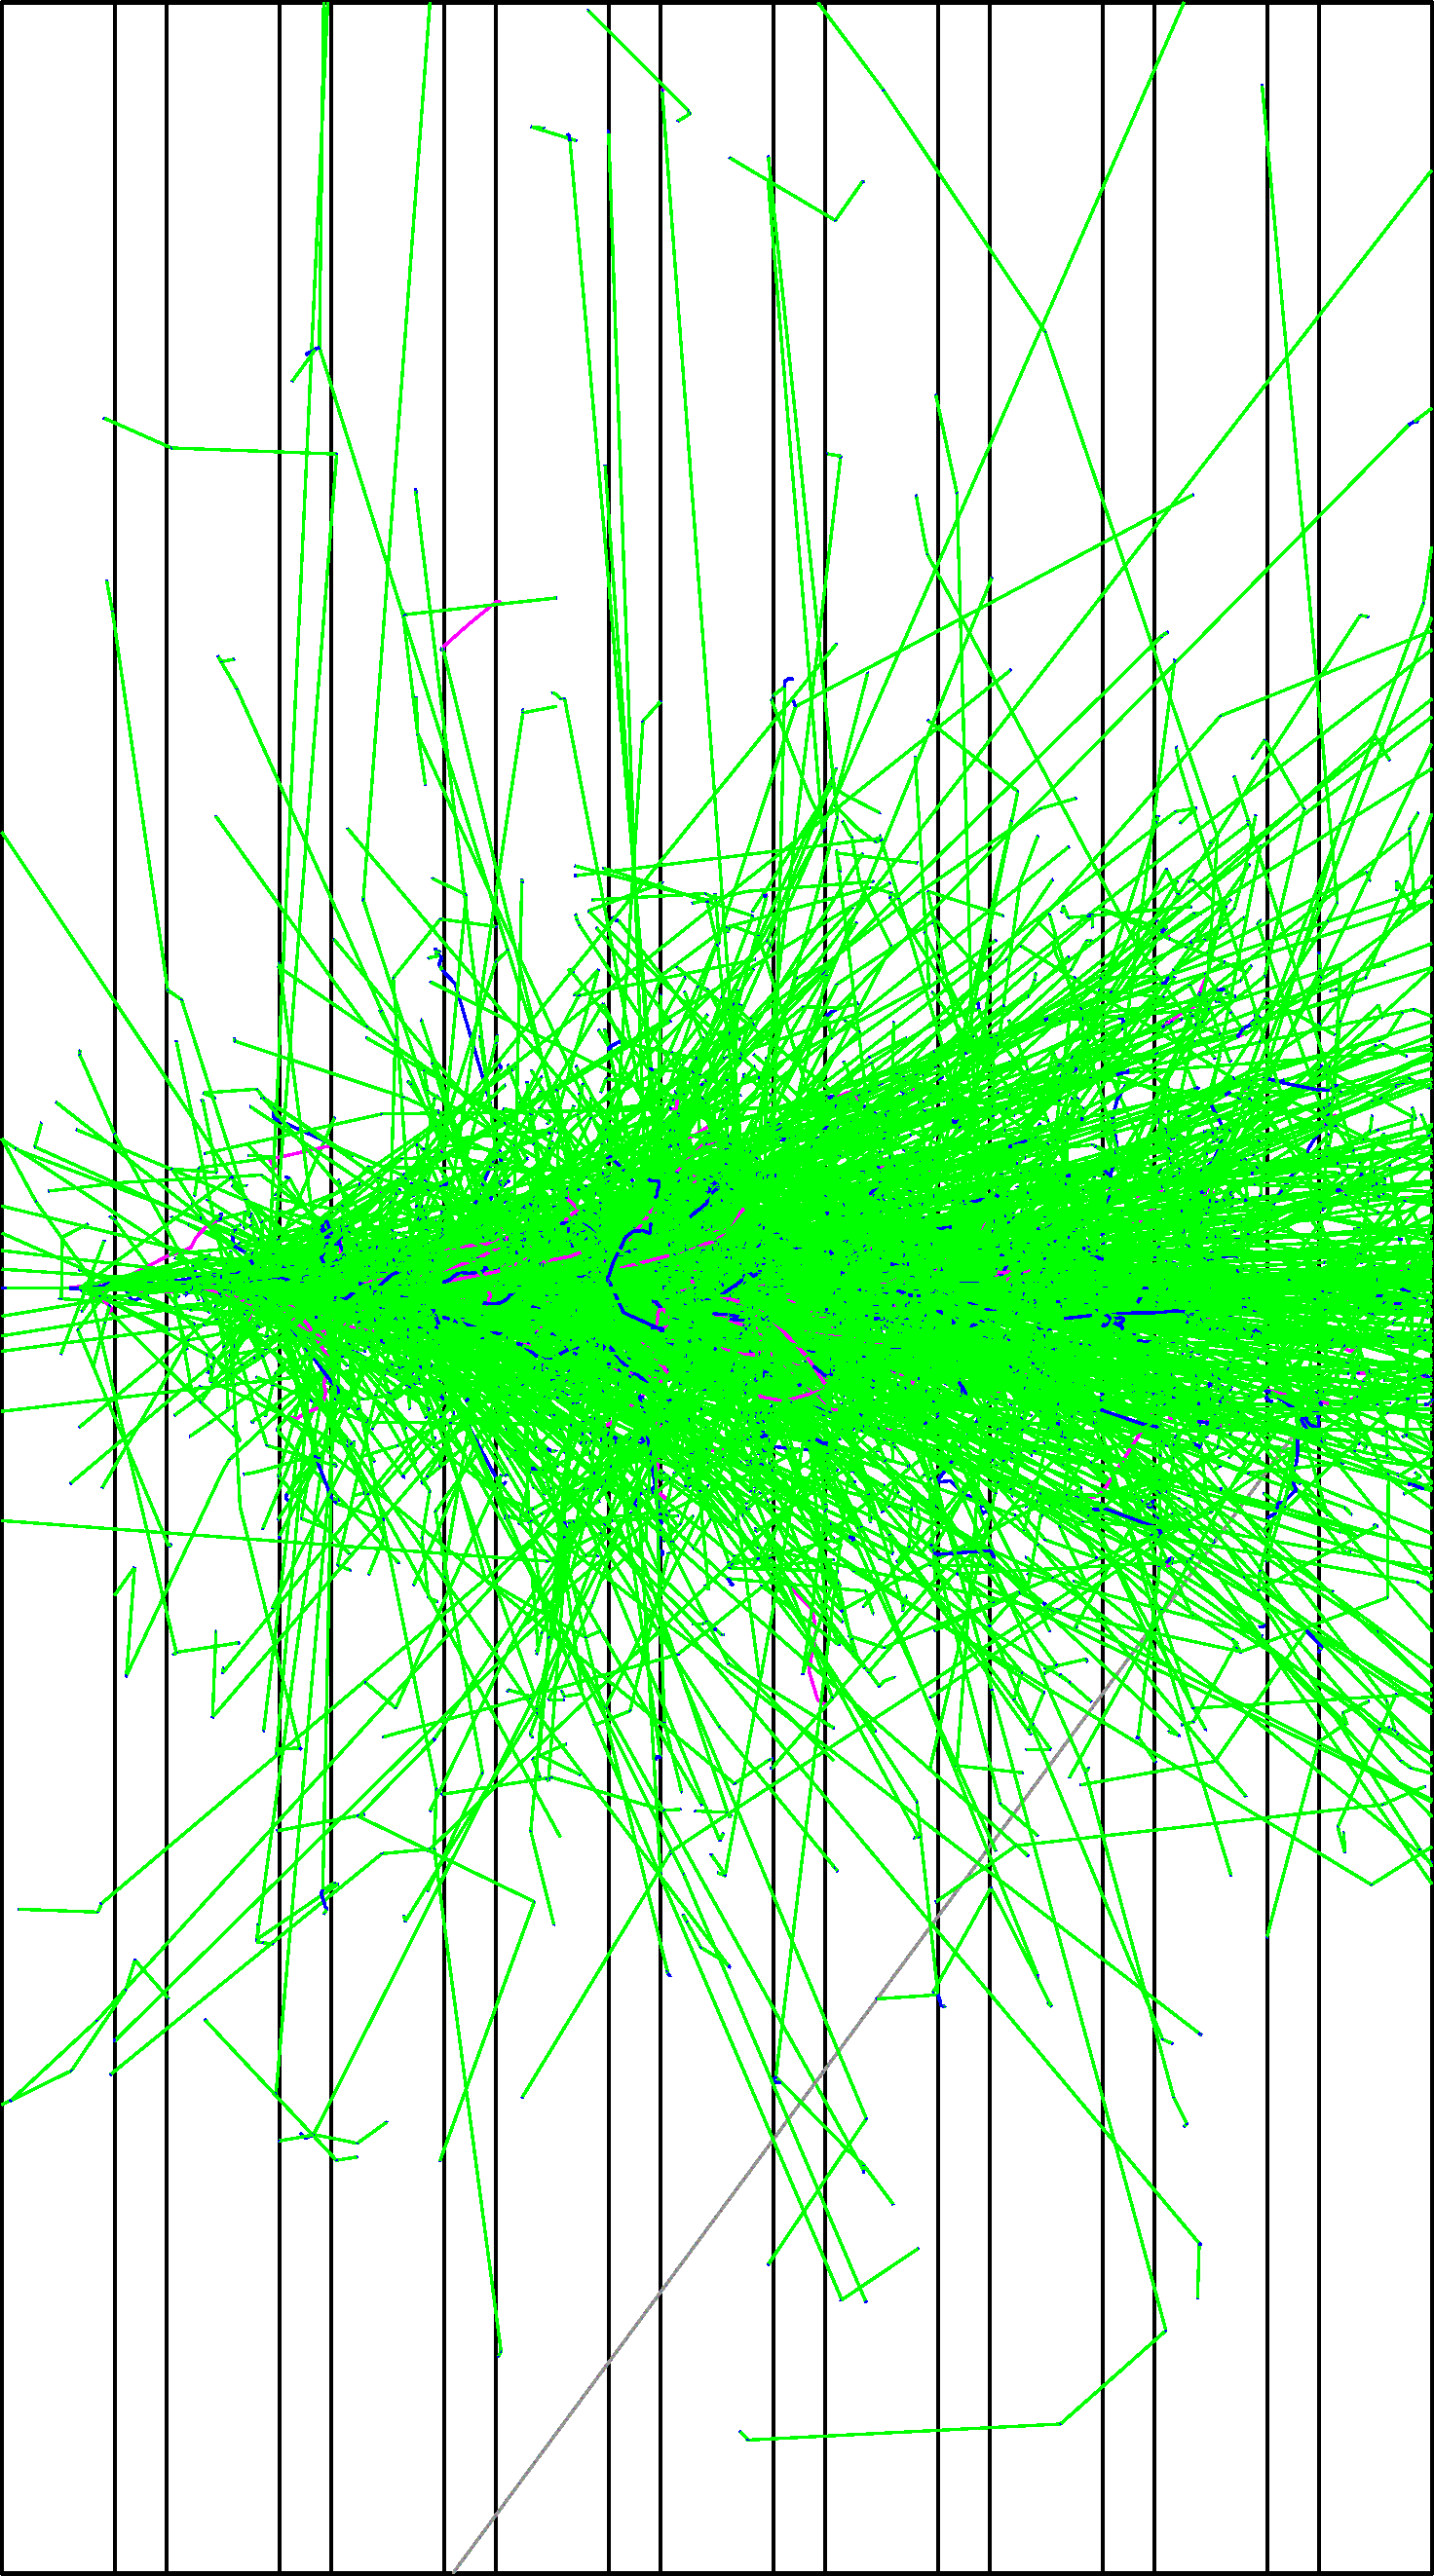

In [11]:
# List of absorber thicknesses to sample from
tList = [0.01, 0.03, 0.05, 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88]
nSamples = 40

resolution = []
resolution_unc = []

for t in tList:
    print("now at absorber thickness "+str(t)+" cm.")
    # Set the geometry used in the simulation to a sampling calorimeter
    # with the requested absorber thickness and a fixed thickness of the
    # active layers.
    # The number of layers is determined such that ~13 X_0 of absorber material
    # are used.
    g4.set_geometry('samplingcalo(%s,0.4,%s)' % (t, int(13 * 0.561/t)))
    # Initialize the simulation.
    g4.initialize()

    # Set the primary particle to electron with energy of 3 GeV.
    g4.set_particle(11)
    g4.set_energy(3.0)
    
    # We use different geometries in this simulation, so we need to calibrate
    # each calorimeter before calculating the resolution for an electron with
    # an energy of 3 GeV.
    cal_const = calibrate_calorimeter()
    
    responses = []
    # Start some runs with the same energy.
    for i in range(nSamples):
        if i == 5:
            g4.start_run(visualize=True)
        else:
            g4.start_run()
        # Calculate the measured energy from the number of tracks and
        # the calibration constant
        responses.append(g4.calo_readout()/cal_const)
    # Calculate the standard deviation of the signal and its uncertainty from
    # the responses
    resolution.append(np.std(responses))
    resolution_unc.append(np.std(responses)/np.sqrt(len(responses)-1))

# Divide the standard deviation by the energy.
for i in range(len(resolution)):
    resolution[i] /= 3.
    resolution_unc[i] /= 3.

/tmp/ipykernel_2666/1464261808.py:2: RuntimeWarning: invalid value encountered in sqrt
  return a * np.sqrt(x)
/tmp/ipykernel_2666/1464261808.py:2: RuntimeWarning: invalid value encountered in sqrt
  return a * np.sqrt(x)


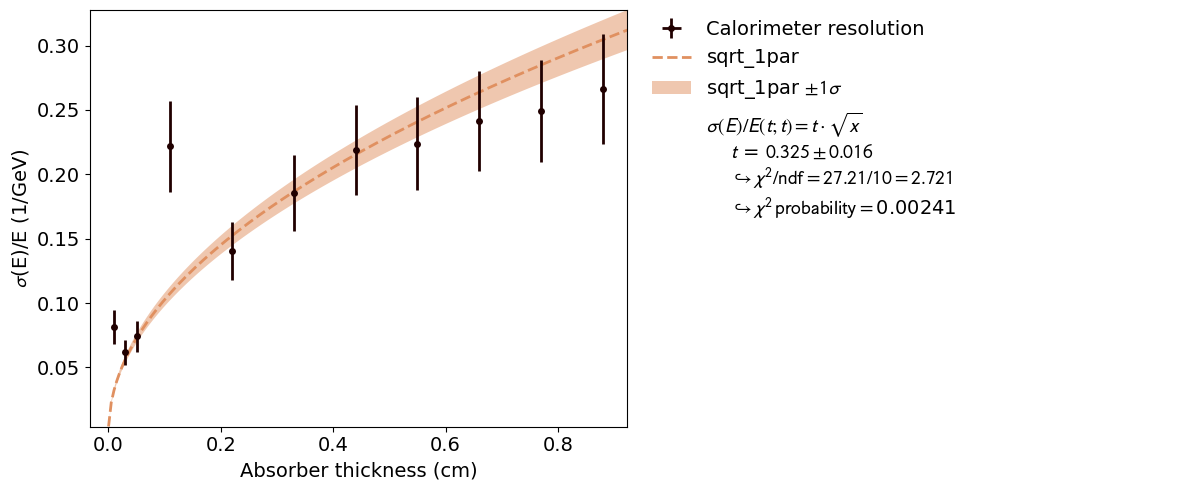

In [12]:
def sqrt_1par(x, a=0.1):
    return a * np.sqrt(x)

data = XYContainer(x_data=tList,
                   y_data=resolution)

data.label = 'Calorimeter resolution'
data.axis_labels = ['Absorber thickness (cm)', r'$\sigma$(E)/E (1/GeV)']

data.add_error(axis='y', err_val=resolution_unc)

# Fit expected dependence to the measured data
res_thick_fit = Fit(data, sqrt_1par)
res_thick_fit.assign_parameter_latex_names(x="t", a="t")
res_thick_fit.assign_model_function_latex_expression("{a} \\cdot \\sqrt{{x}}")
res_thick_fit.assign_model_function_latex_name("\\sigma(E) / E")
res_thick_fit.do_fit()

plot = Plot(fit_objects=res_thick_fit)
plot.plot()
plt.show()